In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('ikm_2023.xlsx')
data.info()

c:\Program Files\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501765 entries, 0 to 501764
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NAMA_LAYANAN         501765 non-null  object
 1   NAMA_JENIS_KRITERIA  501765 non-null  object
 2   NRP                  501765 non-null  int64 
 3   NAMA_SKOR_PENILAIAN  501765 non-null  object
 4   BOBOT                501765 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 19.1+ MB


In [3]:
num_duplicates = data.duplicated().sum()
print("Jumlah baris duplikat:", num_duplicates)

# Menampilkan baris-baris yang duplikat
duplikat_data = data[data.duplicated(keep=False)]
duplikat_data.to_csv('duplikat_data.csv', index=False)

data = data.drop_duplicates()
num_duplicate = data.duplicated().sum()
print("Jumlah baris setelah menghapus duplikat:", num_duplicate)

Jumlah baris duplikat: 729
Jumlah baris setelah menghapus duplikat: 0


In [4]:
# Mendapatkan nilai unik pada kolom 'NAMA_LAYANAN' dan 'NAMA_JENIS_KRITERIA'
unique_layanan = data['NAMA_LAYANAN'].unique()
unique_kriteria = data['NAMA_JENIS_KRITERIA'].unique()

print("Nilai unik pada kolom 'NAMA_LAYANAN':")
print(unique_layanan)
print("\nNilai unik pada kolom 'NAMA_JENIS_KRITERIA':")
print(unique_kriteria)

Nilai unik pada kolom 'NAMA_LAYANAN':
['ADMINISTRASI AKADEMIK' 'ADMINISTRASI KEMAHASISWAAN'
 'ADMINISTRASI KEPEGAWAIAN' 'ADMINISTRASI KERJASAMA'
 'ADMINISTRASI KEUANGAN' 'ADMINISTRASI UMUM (RUMAH TANGGA)' 'KANTIN'
 'KESEKRETARIATAN' 'LAYANAN DOKTER KAMPUS' 'LAYANAN KEAMANAN'
 'LAYANAN PARKIR' 'LINGKUNGAN KAMPUS' 'MAILING LIST'
 'MANAGEMENT INFORMATION SYSTEM (MIS)' 'PERPUSTAKAAN GEDUNG D3'
 'PERPUSTAKAAN GEDUNG D4' 'PERPUSTAKAAN GEDUNG PASCASARJANA'
 'PORTAL JURUSAN/PRODI' 'PORTAL WEB PENS' 'TOILET']

Nilai unik pada kolom 'NAMA_JENIS_KRITERIA':
['Kecepatan dalam melayani' 'Ketrampilan petugas dalam melayani'
 'Persyaratan pelayanan jelas' 'Petugas disiplin terhadap waktu pelayanan'
 'Petugas yang melayani jelas' 'Prosedur pelayanan mudah (diketahui)'
 'Sikap dan perilaku (perilaku) petugas'
 'Tanggung jawab dan empati petugas'
 'Layanan akses informasi sistem seleksi mahasiswa baru'
 'Layanan karir dan bimbingan kewirausahaan'
 'Layanan kesejahteraan berupa bimbingan konseling, beasis

In [5]:
average_score = data.groupby('NAMA_LAYANAN')['BOBOT'].mean()
sorted_average_score = average_score.sort_values()
print("Rata-rata BOBOT yang diurutkan:")
sorted_average_score.head()

Rata-rata BOBOT yang diurutkan:


NAMA_LAYANAN
TOILET                                 3.085797
PORTAL WEB PENS                        3.087362
KANTIN                                 3.089640
PORTAL JURUSAN/PRODI                   3.091208
MANAGEMENT INFORMATION SYSTEM (MIS)    3.106479
Name: BOBOT, dtype: float64

In [6]:
# Fungsi untuk menentukan kategori berdasarkan awalan NRP
def categorize_nrp(nrp):
    nrp_str = str(nrp)
    if str(nrp).startswith('11'):
        return 'S2 Teknik Elektronika'
    elif str(nrp).startswith('12'):
        return 'S2 Teknik Informatika'
    elif str(nrp).startswith('13'):
        return 'D4 LJ Teknik Elektro Industri'
    elif str(nrp).startswith('21'):
        if nrp_str[4:6] == '60':
            return 'D4 Teknik Elektronika'
        elif nrp_str[4:6] == '50':
            return 'D3 Teknik Elektronika'
        elif nrp_str[4:6] == '64':
            return 'D4 LJ Teknik Elektronika'
        elif nrp_str [2:4] == '10':
            return'D4 LJ Teknik Informatika'
        elif nrp_str[2:4] == '03':
            return 'D3 PJJ Teknik Informatika'
    elif str(nrp).startswith('22'):
        if nrp_str[4:6] == '60':
            return 'D4 Teknik Telekomunikasi'
        elif nrp_str[4:6] == '50':
            return 'D3 Teknik Elektro Industri' 
        elif nrp_str [2:4] == '10':
            return 'D4 Teknik Komputer'
        elif nrp_str[4:6]=='61':
            return'D4 PJJ Teknik Telekomunikasi'
        elif nrp_str[4:6] == '64':
            return'D4 LJ Teknik Telekomunikasi'
        elif nrp_str[4:6] == '65':
            return 'D4 LJPJJ Teknik Telekomunikasi'
    elif str(nrp).startswith('23'):
        if nrp_str[4:6] == '60':
            return 'D4 Teknik Elektro Industri'
        elif nrp_str[4:6] == '50':
            return 'D3 Teknik Elektro Industri' 
        elif nrp_str[4:6] == '64':
            return'D4 LJ Teknik Telekomunikasi'
    elif str(nrp).startswith('24'):
        return 'D4 Teknologi Rekayasa Internet' 
    elif str(nrp).startswith('31'):
        if nrp_str[4:6] == '60':
            return 'D4 Teknik Informatika'
        elif nrp_str[4:6] == '50':
            return 'D3 Teknik Informatika'   
        elif nrp_str[2:4] == '10':
            return 'D4 Teknik Mekatronika'  
        elif nrp_str[4:6] == '51':
            return 'D3 PJJ Teknik Informatika' 
        elif nrp_str[4:6] == '52':
            return 'D3 PSDKU Teknik Informatika' 
        elif nrp_str[4:6] == '55':
            return 'D3 LJPJJ Teknik Informatika' 
        elif nrp_str[4:6] == '64':
            return 'D4 LJ Teknik Informatika' 
    elif str(nrp).startswith('32'):
        return 'D4 Teknik Komputer'
    elif str(nrp).startswith('33'):
        return 'D4 Sains Data Terapan'
    elif str(nrp).startswith('41'):
        return 'D4 Teknik Mekatronika'  
    elif str(nrp).startswith('42'):
        return 'D4 Sistem Pembangkit Energi' 
    elif str(nrp).startswith('51'):
        return 'D3 Teknologi Multimedia Broadcasting'   
    elif str(nrp).startswith('52'):
        return 'D4 Teknologi Game'  
    elif str(nrp).startswith('53'):
        return 'D4 Teknologi Rekayasa Multimedia'  
    else:
        return 'Kategori Tidak Diketahui'
data['JURUSAN'] = data['NRP'].apply(categorize_nrp)

nrp_index = data.columns.get_loc('NRP')
cols = data.columns.tolist()
new_order = cols[:nrp_index+1] + ['JURUSAN'] + cols[nrp_index+1:-1]
data = data[new_order]

In [7]:
dte_departments = ['D3 Teknik Elektronika','D4 Teknik Elektronika','D4 LJ Teknik Elektronika','S2 Teknik Elektronika',
                   'D3 Teknik Telekomunikasi','D4 Teknik Telekomunikasi','D4 PJJ Teknik Telekomunikasi','D4 LJ Teknik Telekomunikasi','D4 LJPJJ Teknik Telekomunikasi',
                   'D3 Teknik Elektro Industri','D4 Teknik Elektro Industri','D4 LJ Teknik Elektro Industri','D4 Teknologi Rekayasa Internet']
dtik_departments = ['D3 Teknik Informatika', 'D4 Teknik Informatika', 'D4 LJ Teknik Informatika', 'D3 PSDKU Teknik Informatika', 'D3 LJPJJ Teknik Informatika',
                    'D3 PJJ Teknik Informatika','D3 PJJ Teknik Informatika',
                    'D4 Teknik Komputer', 'D4 Sains Data Terapan', 'S2 Teknik Informatika']
dtme_departments = ['D4 Teknik Mekatronika','D4 Sistem Pembangkit Energi']
dtmk_departments = ['D3 Teknologi Multimedia Broadcasting','D4 Teknologi Game','D4 Teknologi Rekayasa Multimedia']    

def determine_department(jurusan):
    if pd.isna(jurusan) or jurusan.strip() == '':  # Mengecek jika jurusan adalah NaN atau kosong
        return 'Departemen Tidak Diketahui'

    if any(dte in jurusan for dte in dte_departments):
        return 'DTE'
    elif any(dtik in jurusan for dtik in dtik_departments):
        return 'DTIK'
    elif any(dtme in jurusan for dtme in dtme_departments):
        return 'DTME'
    elif any(dtmk in jurusan for dtmk in dtmk_departments):
        return 'DTMK'
    else:
        return 'Departemn tdk diketahui'

data['DEPARTEMEN'] = data['JURUSAN'].apply(determine_department)
jurusan_index = data.columns.get_loc('JURUSAN')

cols = data.columns.tolist()
new_order = cols[:jurusan_index+1] + ['DEPARTEMEN'] + cols[jurusan_index+1:-1]
data = data[new_order]

In [8]:
data['NAMA_SKOR_PENILAIAN'] = data['NAMA_SKOR_PENILAIAN'].replace({
    'tidak': 'Sangat Kurang',     'sulit': 'Sangat Kurang',     'bau': 'Sangat Kurang',    
    'agak': 'Kurang',    'kurang': 'Kurang',     
    'baik': 'Baik',    'rapih': 'Baik',        'mudah': 'Baik',    
    'bersih': 'Baik',       'jelas': 'Baik',     'cepat': 'Baik',    
    'rapi': 'Baik',    'disiplin': 'Baik',     'bagus': 'Baik',     
    'sesuai': 'Baik',    'informatif': 'Baik',    'harum': 'Baik',    
    'up-to-date': 'Baik',     'sangat': 'Sangat Baik',
})

In [9]:
# data1 = data.drop(columns = (['NRP']))
data1 = data.copy()
data1['RESPONDEN'] = 1
data1.to_csv('new_ikm2023.csv', index=False)
data1

,NAMA_LAYANAN,NAMA_JENIS_KRITERIA,NRP,JURUSAN,DEPARTEMEN,NAMA_SKOR_PENILAIAN,BOBOT,RESPONDEN
0,ADMINISTRASI AKADEMIK,Kecepatan dalam melayani,2320600040,D4 Teknik Elektro Industri,DTE,Baik,3,1
1,ADMINISTRASI AKADEMIK,Kecepatan dalam melayani,2222600060,D4 Teknik Telekomunikasi,DTE,Baik,3,1
2,ADMINISTRASI AKADEMIK,Kecepatan dalam melayani,4121600009,D4 Teknik Mekatronika,DTME,Baik,3,1
3,ADMINISTRASI AKADEMIK,Kecepatan dalam melayani,5221600018,D4 Teknologi Game,DTMK,Baik,3,1
4,ADMINISTRASI AKADEMIK,Kecepatan dalam melayani,4220600031,D4 Sistem Pembangkit Energi,DTME,Baik,3,1
...,...,...,...,...,...,...,...,...
501760,TOILET,Persyaratan pelayanan jelas,2322600056,D4 Teknik Elektro Industri,DTE,Sangat Baik,4,1
501761,TOILET,Persyaratan pelayanan jelas,5123500055,D3 Teknologi Multimedia Broadcasting,DTMK,Sangat Baik,4,1
501762,TOILET,Persyaratan pelayanan jelas,2320600003,D4 Teknik Elektro Industri,DTE,Baik,3,1
501763,TOILET,Persyaratan pelayanan jelas,3321600002,D4 Sains Data Terapan,DTIK,Baik,3,1


In [10]:
# # Menghitung jumlah responden ril
# jumlah_responden_unik = data1['NRP'].nunique()
# print("Jumlah responden unik:", jumlah_responden_unik)

# jumlah_responden_per_departemen = data.groupby('DEPARTEMEN')['NRP'].nunique()
# print("\nJumlah responden unik di setiap departemen:")
# print(jumlah_responden_per_departemen)

# jumlah_responden_per_jurusan = data.groupby('JURUSAN')['NRP'].nunique()
# print("\nJumlah responden unik di setiap jurusan:")
# print(jumlah_responden_per_jurusan)

In [11]:
# jumlah_responden_unik = data1['NRP'].nunique()
# jumlah_responden_per_departemen = data.groupby('DEPARTEMEN')['NRP'].nunique().reset_index()
# jumlah_responden_per_departemen.columns = ['DEPARTEMEN', 'Jumlah_Responden_Unik']
# jumlah_responden_per_jurusan = data.groupby('JURUSAN')['NRP'].nunique().reset_index()
# jumlah_responden_per_jurusan.columns = ['JURUSAN', 'Jumlah_Responden_Unik']
# jumlah_responden_per_departemen['Total_Responden_Unik'] = jumlah_responden_unik
# jumlah_responden_per_jurusan['Total_Responden_Unik'] = jumlah_responden_unik

# gabungan_df = pd.concat([jumlah_responden_per_departemen, jumlah_responden_per_jurusan], axis=0, ignore_index=True)
# gabungan_df

In [12]:
df_tidak_diketahui = data1[data1['DEPARTEMEN'] == 'Departemn tdk diketahui']
# df_tidak_diketahui['NRP_6digit'] = df_tidak_diketahui['NRP'].astype(str).str[:6]
# unique_nrp_6digit_sorted = sorted(df_tidak_diketahui['NRP_6digit'].unique())
# df_unique_nrp_6digit_sorted = pd.DataFrame(unique_nrp_6digit_sorted, columns=['NRP_6digit'])

# df_unique_nrp_6digit_sorted.to_csv('nrp_sorted2023.csv', index=False)

In [13]:
# null_counts = data.isnull().sum()
# print("Jumlah data NaN di setiap kolom: \n", null_counts)

In [14]:
# Statistik deskriptif per NAMA_LAYANAN dan NAMA_JENIS_KRITERIA
desc_stats = data1.groupby(['NAMA_LAYANAN', 'NAMA_JENIS_KRITERIA'])['BOBOT'].describe()
print("Statistik Deskriptif:")
desc_stats.to_csv('STD2023.csv', index=False)
desc_stats

Statistik Deskriptif:


count  \
NAMA_LAYANAN          NAMA_JENIS_KRITERIA                                 
ADMINISTRASI AKADEMIK Kecepatan dalam melayani                   3238.0   
                      Ketrampilan petugas dalam melayani         3238.0   
                      Persyaratan pelayanan jelas                3238.0   
                      Petugas disiplin terhadap waktu pelayanan  3238.0   
                      Petugas yang melayani jelas                3238.0   
...                                                                 ...   
TOILET                Bau                                        3193.0   
                      Kebersihan closet                          3194.0   
                      Kebersihan ruangan toilet                  3194.0   
                      Kebersihan wastafel                        3194.0   
                      Persyaratan pelayanan jelas                3193.0   

                                                                     mean  \
NAMA_LAYANAN          NAMA_JENIS_KRITERIA                                   
ADMINISTRASI AKADEMIK Kecepatan dalam melayani                   3.166461   
                      Ketrampilan petugas dalam melayani         3.214330   
                      Persyaratan pelayanan jelas                3.189314   
                      Petugas disiplin terhadap waktu pelayanan  3.178505   
                      Petugas yang melayani jelas                3.179123   
...                                                                   ...   
TOILET                Bau                                        2.985280   
                      Kebersihan closet                          3.085473   
                      Kebersihan ruangan toilet                  3.088604   
                      Kebersihan wastafel                        3.110833   
                      Persyaratan pelayanan jelas                3.158785   

                                                                      std  \
NAMA_LAYANAN          NAMA_JENIS_KRITERIA                                   
ADMINISTRASI AKADEMIK Kecepatan dalam melayani                   0.580093   
                      Ketrampilan petugas dalam melayani         0.560588   
                      Persyaratan pelayanan jelas                0.563801   
                      Petugas disiplin terhadap waktu pelayanan  0.586330   
                      Petugas yang melayani jelas                0.581378   
...                                                                   ...   
TOILET                Bau                                        0.704957   
                      Kebersihan closet                          0.616524   
                      Kebersihan ruangan toilet                  0.620640   
                      Kebersihan wastafel                        0.600857   
                      Persyaratan pelayanan jelas                0.568739   

                                                                 min  25%  \
NAMA_LAYANAN          NAMA_JENIS_KRITERIA                                   
ADMINISTRASI AKADEMIK Kecepatan dalam melayani                   1.0  3.0   
                      Ketrampilan petugas dalam melayani         1.0  3.0   
                      Persyaratan pelayanan jelas                1.0  3.0   
                      Petugas disiplin terhadap waktu pelayanan  1.0  3.0   
                      Petugas yang melayani jelas                1.0  3.0   
...                                                              ...  ...   
TOILET                Bau                                        1.0  3.0   
                      Kebersihan closet                          1.0  3.0   
                      Kebersihan ruangan toilet                  1.0  3.0   
                      Kebersihan wastafel                        1.0  3.0   
                      Persyaratan pelayanan jelas                1.0  3.0   

                                                                 50%  75%  max  
NAM

In [15]:
# # Visualisasi distribusi BOBOT untuk setiap NAMA_JENIS_KRITERIA
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='NAMA_JENIS_KRITERIA', y='BOBOT', hue='NAMA_LAYANAN', data=data)
# plt.xticks(rotation=45)
# plt.title('Distribusi BOBOT untuk Setiap NAMA_JENIS_KRITERIA')
# plt.show()

In [16]:
# # Korelasi antara BOBOT dan SKOR_PENILAIAN_NUMERIC
# correlation = data[['BOBOT', 'NAMA_SKOR_PENILAIAN']].corr().iloc[0, 1]
# print(f"Korelasi antara BOBOT dan SKOR_PENILAIAN_NUMERIC: {correlation:.2f}")

In [17]:
# Menghitung total BOBOT
total_bobot = data1['BOBOT'].sum()
print("Total BOBOT:", total_bobot)  # Output: 9.0 (mengabaikan None)

# Menghitung jumlah nilai BOBOT non-null
count_bobot = data1['BOBOT'].count()
print("Jumlah nilai BOBOT:", count_bobot)  # Output: 4

Total BOBOT: 1602122
Jumlah nilai BOBOT: 501036


In [18]:
data1['NAMA_LAYANAN'] = data1['NAMA_LAYANAN'].replace({
    'ADMINISTRASI AKADEMIK': 'AD',
    'ADMINISTRASI KEMAHASISWAAN': 'AKM',
    'ADMINISTRASI KEPEGAWAIAN' : 'AKP',
    'ADMINISTRASI KERJASAMA' : 'AKJ',
    'ADMINISTRASI KEUANGAN' : 'AKU',
    'ADMINISTRASI UMUM (RUMAH TANGGA)' : 'AU',
    'KANTIN' : 'KT',
    'KESEKRETARIATAN' : 'KS',
    'LAYANAN DOKTER KAMPUS' : 'DR',
    'LAYANAN KEAMANAN' : 'LKA',
    'LAYANAN PARKIR' : 'LP',
    'LINGKUNGAN KAMPUS' : 'LK',
    'MAILING LIST' : 'ML',
    'MANAGEMENT INFORMATION SYSTEM (MIS)' : 'MIS',
    'PERPUSTAKAAN GEDUNG D3' : 'P3',
    'PERPUSTAKAAN GEDUNG D4' : 'P4',
    'PERPUSTAKAAN GEDUNG PASCASARJANA' : 'PS',
    'PORTAL JURUSAN/PRODI' : 'PJ',
    'PORTAL WEB PENS' : 'PW',
    'TOILET' : 'TL',
})

In [19]:
# filtered_data = data[data['NAMA_LAYANAN'] == 'AD']

# total_bobot_per_jenis = filtered_data.groupby('NAMA_JENIS_KRITERIA')['BOBOT'].sum()
# print("Total BOBOT untuk setiap NAMA_JENIS_KRITERIA dengan NAMA_LAYANAN 'AD':\n")
# print(total_bobot_per_jenis)

In [20]:
total_bobot_layanan = data.groupby(['NAMA_LAYANAN', 'NAMA_JENIS_KRITERIA'])['BOBOT'].sum()
print("Total BOBOT untuk setiap NAMA_JENIS_KRITERIA pada masing-masing NAMA_LAYANAN:\n")
print(total_bobot_layanan)

# total_bobot_layanan.to_csv('bobot_layanan.csv')

Total BOBOT untuk setiap NAMA_JENIS_KRITERIA pada masing-masing NAMA_LAYANAN:

NAMA_LAYANAN           NAMA_JENIS_KRITERIA                      
ADMINISTRASI AKADEMIK  Kecepatan dalam melayani                     10253
                       Ketrampilan petugas dalam melayani           10408
                       Persyaratan pelayanan jelas                  10327
                       Petugas disiplin terhadap waktu pelayanan    10292
                       Petugas yang melayani jelas                  10294
                                                                    ...  
TOILET                 Bau                                           9532
                       Kebersihan closet                             9855
                       Kebersihan ruangan toilet                     9865
                       Kebersihan wastafel                           9936
                       Persyaratan pelayanan jelas                  10086
Name: BOBOT, Length: 158, dtype: int64


In [21]:
filtered_data = data1[data1['NAMA_LAYANAN'] == 'AKM']
unique_nama_jenis_kriteria = filtered_data['NAMA_JENIS_KRITERIA'].unique()
print("Nilai unik pada kolom 'NAMA_JENIS_KRITERIA':")
print(unique_nama_jenis_kriteria)

unique_count = len(unique_nama_jenis_kriteria)
print(f"\nJumlah nilai unik: {unique_count}")

Nilai unik pada kolom 'NAMA_JENIS_KRITERIA':
['Kecepatan dalam melayani' 'Ketrampilan petugas dalam melayani'
 'Layanan akses informasi sistem seleksi mahasiswa baru'
 'Layanan karir dan bimbingan kewirausahaan'
 'Layanan kesejahteraan berupa bimbingan konseling, beasiswa, dan layanan kesehatan'
 'Layanan minat dan bakat termasuk kegiatan mahasiswa dan UKM'
 'Layanan penalaran, dan softskills'
 'Layanan proses registrasi mahasiswa baru ' 'Penataan sarana rapi'
 'Persyaratan pelayanan jelas' 'Petugas disiplin terhadap waktu pelayanan'
 'Petugas yang melayani jelas' 'Prosedur pelayanan mudah (diketahui)'
 'Ruangan bersih' 'Sikap dan perilaku (perilaku) petugas'
 'Tanggung jawab dan empati petugas']

Jumlah nilai unik: 16


In [22]:
def rename_criteria(row):
    if row['NAMA_LAYANAN'] == 'AD':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'AD1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'AD2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'AD3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'AD4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'AD5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'AD6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'AD7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'AD8'
    elif row['NAMA_LAYANAN'] == 'AKM':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'AKM1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'AKM2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Layanan akses informasi sistem seleksi mahasiswa baru':
            return 'AKM3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Layanan karir dan bimbingan kewirausahaan':
            return 'AKM4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Layanan kesejahteraan berupa bimbingan konseling, beasiswa, dan layanan kesehatan':
            return 'AKM5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Layanan minat dan bakat termasuk kegiatan mahasiswa dan UKM':
            return 'AKM6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Layanan penalaran, dan softskills':
            return 'AKM7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Layanan proses registrasi mahasiswa baru ':
            return 'AKM8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'AKM9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'AKM10'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'AKM11'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'AKM12'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'AKM13'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'AKM14'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'AKM15'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'AKM16'
    elif row['NAMA_LAYANAN'] == 'AKP':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'AKP1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'AKP2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'AKP3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'AKP4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'AKP5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'AKP6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'AKP7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'AKP8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'AKP9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'AKP10'
    elif row['NAMA_LAYANAN'] == 'AKJ':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'AKJ1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'AKJ2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'AKJ3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'AKJ4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'AKJ5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'AKJ6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'AKJ7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'AKJ8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'AKJ9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'AKJ10'
    elif row['NAMA_LAYANAN'] == 'AKU':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'AKU1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'AKU2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'AKU3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'AKU4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'AKU5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'AKU6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'AKU7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'AKU8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'AKU9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'AKU10'
    elif row['NAMA_LAYANAN'] == 'AU':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'AU1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'AU2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'AU3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'AU4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'AU5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'AU6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'AU7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'AU8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'AU9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'AU10'
        
    elif row['NAMA_LAYANAN'] == 'KT':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'KT1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'KT2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'KT3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'KT4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'KT5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'KT6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'KT7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'KT8'
    elif row['NAMA_LAYANAN'] == 'KS':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'KS1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'KS2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'KS3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'KS4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'KS5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'KS6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'KS7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'KS8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'KS9'
    elif row['NAMA_LAYANAN'] == 'DR':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'DR1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'DR2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'DR3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'DR4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'DR5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'DR6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'DR7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'DR8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'DR9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'DR10'
    elif row['NAMA_LAYANAN'] == 'LKA':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'LKA1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'LKA2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'LKA3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'LKA4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'LKA5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'LKA6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'LKA7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'LKA8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'LKA9'
    elif row['NAMA_LAYANAN'] == 'LP':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'LP1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'LP2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'LP3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'LP4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'LP5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'LP6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'LP7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'LP8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'LP9'
    elif row['NAMA_LAYANAN'] == 'LK':
        if row['NAMA_JENIS_KRITERIA'] == 'Lingkungan bersih':
            return 'LK1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan (taman, dll.)  bagus':
            return 'LK2'
    elif row['NAMA_LAYANAN'] == 'ML':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan akses':
            return 'ML1'
    elif row['NAMA_LAYANAN'] == 'MIS':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan akses':
            return 'MIS1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Keragaman fitur/konten':
            return 'MIS2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Konten/berita informatif':
            return 'MIS3'

    elif row['NAMA_LAYANAN'] == 'P3':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'P3_1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'P3_2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'P3_3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'P3_4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'P3_5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'P3_6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'P3_7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'P3_8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'P3_9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'P3_10'
    elif row['NAMA_LAYANAN'] == 'P4':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'P4_1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'P4_2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'P4_3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'P4_4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'P4_5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'P4_6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'P4_7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'P4_8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'P4_9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'P4_10'
    elif row['NAMA_LAYANAN'] == 'PS':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan dalam melayani':
            return 'PS_1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ketrampilan petugas dalam melayani':
            return 'PS_2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Penataan sarana rapi':
            return 'PS_3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'PS_4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas disiplin terhadap waktu pelayanan':
            return 'PS_5'
        elif row['NAMA_JENIS_KRITERIA'] == 'Petugas yang melayani jelas':
            return 'PS_6'
        elif row['NAMA_JENIS_KRITERIA'] == 'Prosedur pelayanan mudah (diketahui)':
            return 'PS_7'
        elif row['NAMA_JENIS_KRITERIA'] == 'Ruangan bersih':
            return 'PS_8'
        elif row['NAMA_JENIS_KRITERIA'] == 'Sikap dan perilaku (perilaku) petugas':
            return 'PS_9'
        elif row['NAMA_JENIS_KRITERIA'] == 'Tanggung jawab dan empati petugas':
            return 'PS_10'
    elif row['NAMA_LAYANAN'] == 'PJ':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan akses':
            return 'PJ1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Keragaman fitur/konten':
            return 'PJ2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Konten/berita informatif':
            return 'PJ3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Konten/berita up-to-date':
            return 'PJ4'
    elif row['NAMA_LAYANAN'] == 'PW':
        if row['NAMA_JENIS_KRITERIA'] == 'Kecepatan akses':
            return 'PW1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Keragaman fitur/konten':
            return 'PW2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Konten/berita informatif':
            return 'PW3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Konten/berita up-to-date':
            return 'PW4'
    elif row['NAMA_LAYANAN'] == 'TL':
        if row['NAMA_JENIS_KRITERIA'] == 'Bau':
            return 'TL1'
        elif row['NAMA_JENIS_KRITERIA'] == 'Kebersihan closet':
            return 'TL2'
        elif row['NAMA_JENIS_KRITERIA'] == 'Kebersihan ruangan toilet':
            return 'TL3'
        elif row['NAMA_JENIS_KRITERIA'] == 'Kebersihan wastafel':
            return 'TL4'
        elif row['NAMA_JENIS_KRITERIA'] == 'Persyaratan pelayanan jelas':
            return 'TL5'

    # Return the original value if no match
    return row['NAMA_JENIS_KRITERIA']

# Apply the renaming function to the DataFrame
data1['NAMA_JENIS_KRITERIA'] = data1.apply(rename_criteria, axis=1)

In [23]:
# data2 = data1.drop(columns = (['NAMA_LAYANAN','JURUSAN','DEPARTEMEN','NAMA_SKOR_PENILAIAN']))
data2 = data1.drop(columns = (['NRP','NAMA_LAYANAN','JURUSAN','DEPARTEMEN','NAMA_SKOR_PENILAIAN','RESPONDEN']))
data2.to_csv('process_ikm2023.csv', index=False)

In [24]:
layanan_ad = data2.iloc[0:3238]
df_pivoted1 = layanan_ad.pivot_table(index=layanan_ad.index, columns='NAMA_JENIS_KRITERIA', values='BOBOT', aggfunc='first')
df_pivoted1.reset_index(drop=True, inplace=True)

layanan_ad.head()

,NAMA_JENIS_KRITERIA,BOBOT
0,AD1,3
1,AD1,3
2,AD1,3
3,AD1,3
4,AD1,3


In [25]:
def process_layanan(data, start_row, end_row, criteria_name):
    subset = data.iloc[start_row:end_row]
    pivoted_df = subset.pivot_table(
        index=subset.index,
        columns='NAMA_JENIS_KRITERIA',
        values='BOBOT',
        aggfunc='first'
    )
    
    pivoted_df.reset_index(drop=True, inplace=True)
    pivoted_df.columns = [criteria_name]
    return pivoted_df
ranges = [
    (0, 3238, 'AD1'),     (3238, 6476, 'AD2'),     (6476, 9714, 'AD3'),    (9714, 12952, 'AD4'),
    (12952, 16190, 'AD5'),    (16190, 19428, 'AD6'),    (19428, 22666, 'AD7'),    (22666, 25904, 'AD8'),
    (25904, 29122, 'AKM1'),    (29122, 32340, 'AKM2'),    (32340, 35558, 'AKM3'),    (35558, 38776, 'AKM4'),
    (38776, 41994, 'AKM5'),    (41994, 45212, 'AKM6'),    (45212, 48430, 'AKM7'),    (48430, 51648, 'AKM8'),
    (51648, 54866, 'AKM9'),    (54867, 58085, 'AKM10'),    (58085, 61303, 'AKM11'),    (61303, 64521, 'AKM12'),
    (64521, 67739, 'AKM13'),    (67739, 70957, 'AKM14'),    (70958, 74176, 'AKM15'),    (74176, 77394, 'AKM16'),
    (77394, 80603, 'AKP1'),    (80603, 83812, 'AKP2'),    (83812, 87021, 'AKP3'),    (87021, 90230, 'AKP4'),    (90230, 93439, 'AKP5'),    
    (93439, 96648, 'AKP6'),    (96648, 99857, 'AKP7'),    (99857, 103066, 'AKP8'),    (103066, 106275, 'AKP9'),    (106275, 109484, 'AKP10'),
    (109484, 112689, 'AKJ1'),    (112690, 115895, 'AKJ2'),    (115896, 119101, 'AKJ3'),    (119101, 122306, 'AKJ4'),    (122307, 125512, 'AKJ5'),
    (125512, 128717, 'AKJ6'),    (128718, 131923, 'AKJ7'),    (131924, 135129, 'AKJ8'),    (135130, 138335, 'AKJ9'),    (138336, 141541, 'AKJ10'),
    (141541, 144753, 'AKU1'),    (144753, 147965, 'AKU2'),    (147965, 151177, 'AKU3'),    (151177, 154389, 'AKU4'),    (154389, 157601, 'AKU5'),
    (157602, 160814, 'AKU6'),    (160814, 164026, 'AKU7'),    (164027, 167239, 'AKU8'),    (167239, 170451, 'AKU9'),    (170452, 173664, 'AKU10'),
    (173664, 176870, 'AU1'),    (176870, 180076, 'AU2'),    (180076, 183282, 'AU3'),    (183282, 186488, 'AU4'),    (186488, 189694, 'AU5'),
    (189694, 192900, 'AU6'),    (192900, 196106, 'AU7'),    (196106, 199312, 'AU8'),    (199312, 202518, 'AU9'),    (202518, 205724, 'AU10'),
    (205724, 208921, 'KT1'),    (208921, 212118, 'KT2'),    (212119, 215316, 'KT3'),    (215317, 218514, 'KT4'),
    (218515, 221712, 'KT5'),    (221712, 224909, 'KT6'),    (224909, 228106, 'KT7'),    (228107, 231304, 'KT8'),
    (231304, 234504, 'KS1'),    (234504, 237704, 'KS2'),    (237704, 240904, 'KS3'),    (240904, 244104, 'KS4'),    (244104, 247304, 'KS5'),
    (247304, 250504, 'KS6'),    (250504, 253704, 'KS7'),    (253704, 256904, 'KS8'),    (256904, 260104, 'KS9'),
    (260104, 263299, 'DR1'),    (263299, 266494, 'DR2'),    (266494, 269689, 'DR3'),    (269689, 272884, 'DR4'),    (272884, 276079, 'DR5'),
    (276079, 279274, 'DR6'),    (279274, 282469, 'DR7'),    (282469, 285664, 'DR8'),    (285664, 288859, 'DR9'),    (288859, 292054, 'DR10'),
    (292054, 295248, 'LKA1'),    (295248, 298442, 'LKA2'),    (298442, 301636, 'LKA3'),    (301636, 304830, 'LKA4'),    (304830, 308024, 'LKA5'),
    (308024, 311218, 'LKA6'),    (311218, 314412, 'LKA7'),    (314412, 317606, 'LKA8'),    (317606, 320800, 'LKA9'),
    (320801, 323996, 'LP1'),    (323996, 327191, 'LP2'),    (327191, 330386, 'LP3'),    (330386, 333581, 'LP4'),    (333581, 336776, 'LP5'),
    (336776, 339971, 'LP6'),    (339971, 343166, 'LP7'),    (343166, 346361, 'LP8'),    (346361, 349556, 'LP9'),
    (349556, 352749, 'LK1'),     (352749, 355942, 'LK2'),    (355942, 359136, 'ML1'),
    (359136, 362326, 'MIS1'),    (362326, 365516, 'MIS2'),    (365516, 368706, 'MIS3'),
    (368707, 371910, 'P3_1'),    (371910, 375113, 'P3_2'),    (375114, 378317, 'P3_3'),    (378318, 381521, 'P3_4'),    (381521, 384724, 'P3_5'),
    (384724, 387927, 'P3_6'),    (387928, 391131, 'P3_7'),    (391132, 394335, 'P3_8'),    (394336, 397539, 'P3_9'),    (397539, 400742,'P3_10'),
    (400743, 403684, 'P4_1'),    (403684, 406625, 'P4_2'),    (406625, 409566, 'P4_3'),    (409566, 412507, 'P4_4'),    (412507, 415448, 'P4_5'),
    (415448, 418389, 'P4_6'),    (418389, 421330, 'P4_7'),    (421330, 424271, 'P4_8'),    (424271, 427212, 'P4_9'),    (427212, 430153, 'P4_10'),
    (430153, 433092, 'PS_1'),    (433092, 436031, 'PS_2'),    (436031, 438970, 'PS_3'),    (438970, 441909, 'PS_4'),    (441909, 444848, 'PS_5'),
    (444848, 447787, 'PS_6'),    (447787, 450726, 'PS_7'),    (450726, 453665, 'PS_8'),    (453665, 456604, 'PS_9'),    (456604, 459543, 'PS_10'),
    (459543, 462733, 'PJ_1'),    (462733, 465923, 'PJ_2'),    (465923, 469113, 'PJ_3'),    (469114, 472304, 'PJ_4'),
    (472305, 475495, 'PW_1'),    (475496, 478686, 'PW_2'),    (478686, 481876, 'PW_3'),    (481877, 485067, 'PW_4'),
    (485068, 488261, 'TL_1'),    (488261, 491454, 'TL_2'),    (491455, 494648, 'TL_3'),    (494649, 497842, 'TL_4'),    (497843, 501036, 'TL_5')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combinedall = pd.concat(processed_dfs, axis=1)

numeric_columns = df_combinedall.select_dtypes(include=['float64', 'int64']).columns
df_combinedall[numeric_columns] = df_combinedall[numeric_columns].fillna(0).astype(int)
df_combinedall.to_csv('combained_ikm2023.csv', index=False)
# df_combinedall.head(2920)
df_combinedall

,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AKM1,AKM2,...,PJ_4,PW_1,PW_2,PW_3,PW_4,TL_1,TL_2,TL_3,TL_4,TL_5
0,3,3,3,4,3,3,3,3,3,3,...,3,3,4,3,3,3,3,3,3,4
1,3,3,2,3,3,3,3,3,3,3,...,3,2,2,2,4,3,3,3,4,4
2,3,4,4,2,3,3,3,3,3,3,...,4,4,3,2,4,4,4,3,4,3
3,3,4,3,4,4,3,3,3,3,3,...,3,4,3,2,3,3,3,4,3,3
4,3,3,3,3,4,4,4,4,1,3,...,3,3,3,3,3,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,4,4,3,3,2,3,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3234,3,3,3,3,3,3,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3235,3,3,4,3,3,2,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3236,3,3,3,4,3,4,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
def jumlahkan_dan_buat_tabel(data, kolom_awal, kolom_akhir, nama_kolom):
    hasil_jumlah = data.iloc[:, kolom_awal:kolom_akhir+1].sum(axis=1)
    tabel_hasil = pd.concat([data.iloc[:, :kolom_akhir+1], hasil_jumlah, data.iloc[:, kolom_akhir+1:]], axis=1)
    tabel_hasil.columns = list(data.columns[:kolom_akhir+1]) + [nama_kolom] + list(data.columns[kolom_akhir+1:])
    return tabel_hasil

operasi1 = jumlahkan_dan_buat_tabel(df_combinedall, 0, 7, 'SUM AD')
operasi2 = jumlahkan_dan_buat_tabel(operasi1, 9, 24, 'SUM AKM')
operasi3 = jumlahkan_dan_buat_tabel(operasi2, 26, 35, 'SUM AKP')
operasi4 = jumlahkan_dan_buat_tabel(operasi3, 37, 46, 'SUM AKJ')
operasi5 = jumlahkan_dan_buat_tabel(operasi4, 48, 57, 'SUM AKU')
operasi6 = jumlahkan_dan_buat_tabel(operasi5, 59, 68, 'SUM AU')
operasi7 = jumlahkan_dan_buat_tabel(operasi6, 70, 77, 'SUM KT')
operasi8 = jumlahkan_dan_buat_tabel(operasi7, 79, 87, 'SUM KS')
operasi9 = jumlahkan_dan_buat_tabel(operasi8, 89, 98, 'SUM DR')
operasi10 = jumlahkan_dan_buat_tabel(operasi9, 100, 108, 'SUM LKA')
operasi11 = jumlahkan_dan_buat_tabel(operasi10, 110, 118, 'SUM LP')
operasi12 = jumlahkan_dan_buat_tabel(operasi11, 120, 121, 'SUM LK')
operasi13 = jumlahkan_dan_buat_tabel(operasi12, 124, 126, 'SUM MIS')
operasi14 = jumlahkan_dan_buat_tabel(operasi13, 128, 137, 'SUM P3')
operasi15 = jumlahkan_dan_buat_tabel(operasi14, 139, 148, 'SUM P4')
operasi16 = jumlahkan_dan_buat_tabel(operasi15, 150, 159, 'SUM PS')
operasi17 = jumlahkan_dan_buat_tabel(operasi16, 161, 164, 'SUM PJ')
operasi18 = jumlahkan_dan_buat_tabel(operasi17, 166, 169, 'SUM PW')
operasi19 = jumlahkan_dan_buat_tabel(operasi18, 171, 175, 'SUM TL')
operasi20 = jumlahkan_dan_buat_tabel(operasi19, 122, 123, 'SUM ML')

operasi20.to_csv('sum_ikm2023.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_12308\3640090696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfq['Total_Skor'] = dfq.sum(axis = 1, skipna = True)


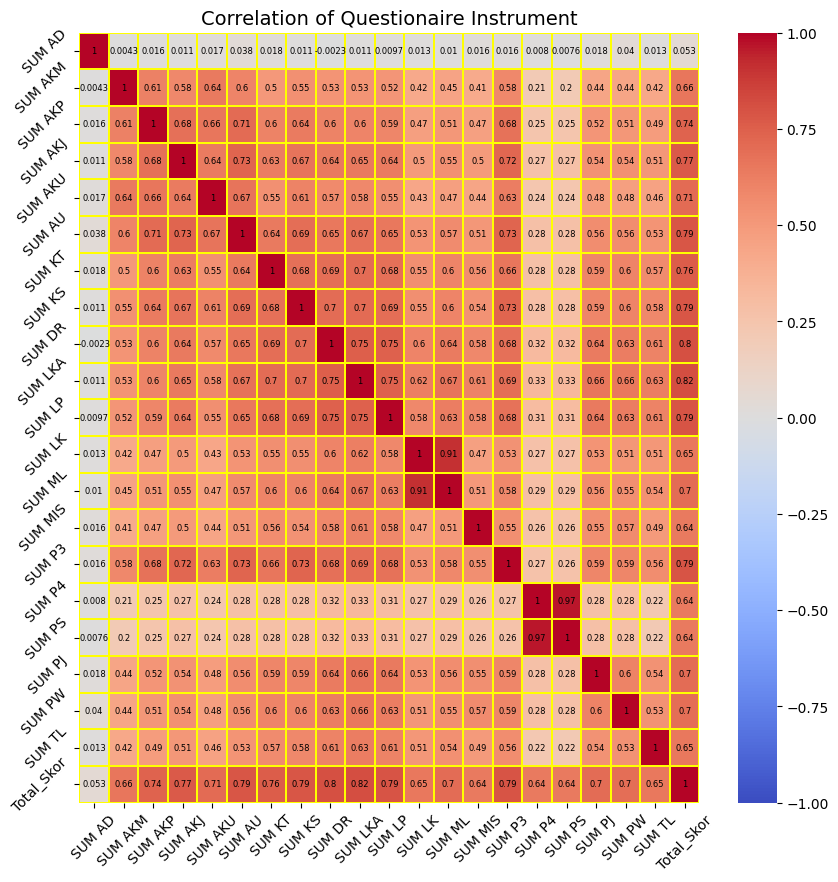

In [27]:
# Memilih kolom-kolom dengan 'SUM P1' hingga 'SUM P5'
dfq = operasi20[['SUM AD', 'SUM AKM', 'SUM AKP', 'SUM AKJ', 'SUM AKU', 
                 'SUM AU', 'SUM KT', 'SUM KS', 'SUM DR', 'SUM LKA', 
                 'SUM LP', 'SUM LK', 'SUM ML', 'SUM MIS', 'SUM P3', 
                 'SUM P4', 'SUM PS','SUM PJ', 'SUM PW', 'SUM TL']]
dfq['Total_Skor'] = dfq.sum(axis = 1, skipna = True)
corr_matrix = dfq.corr()

fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.2,
            linecolor='YELLOW',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':6,'color':'black'})

plt.tick_params(labelsize=10, rotation=45)
plt.title('Correlation of Questionaire Instrument', size=14)
plt.savefig("corr_quest.png")

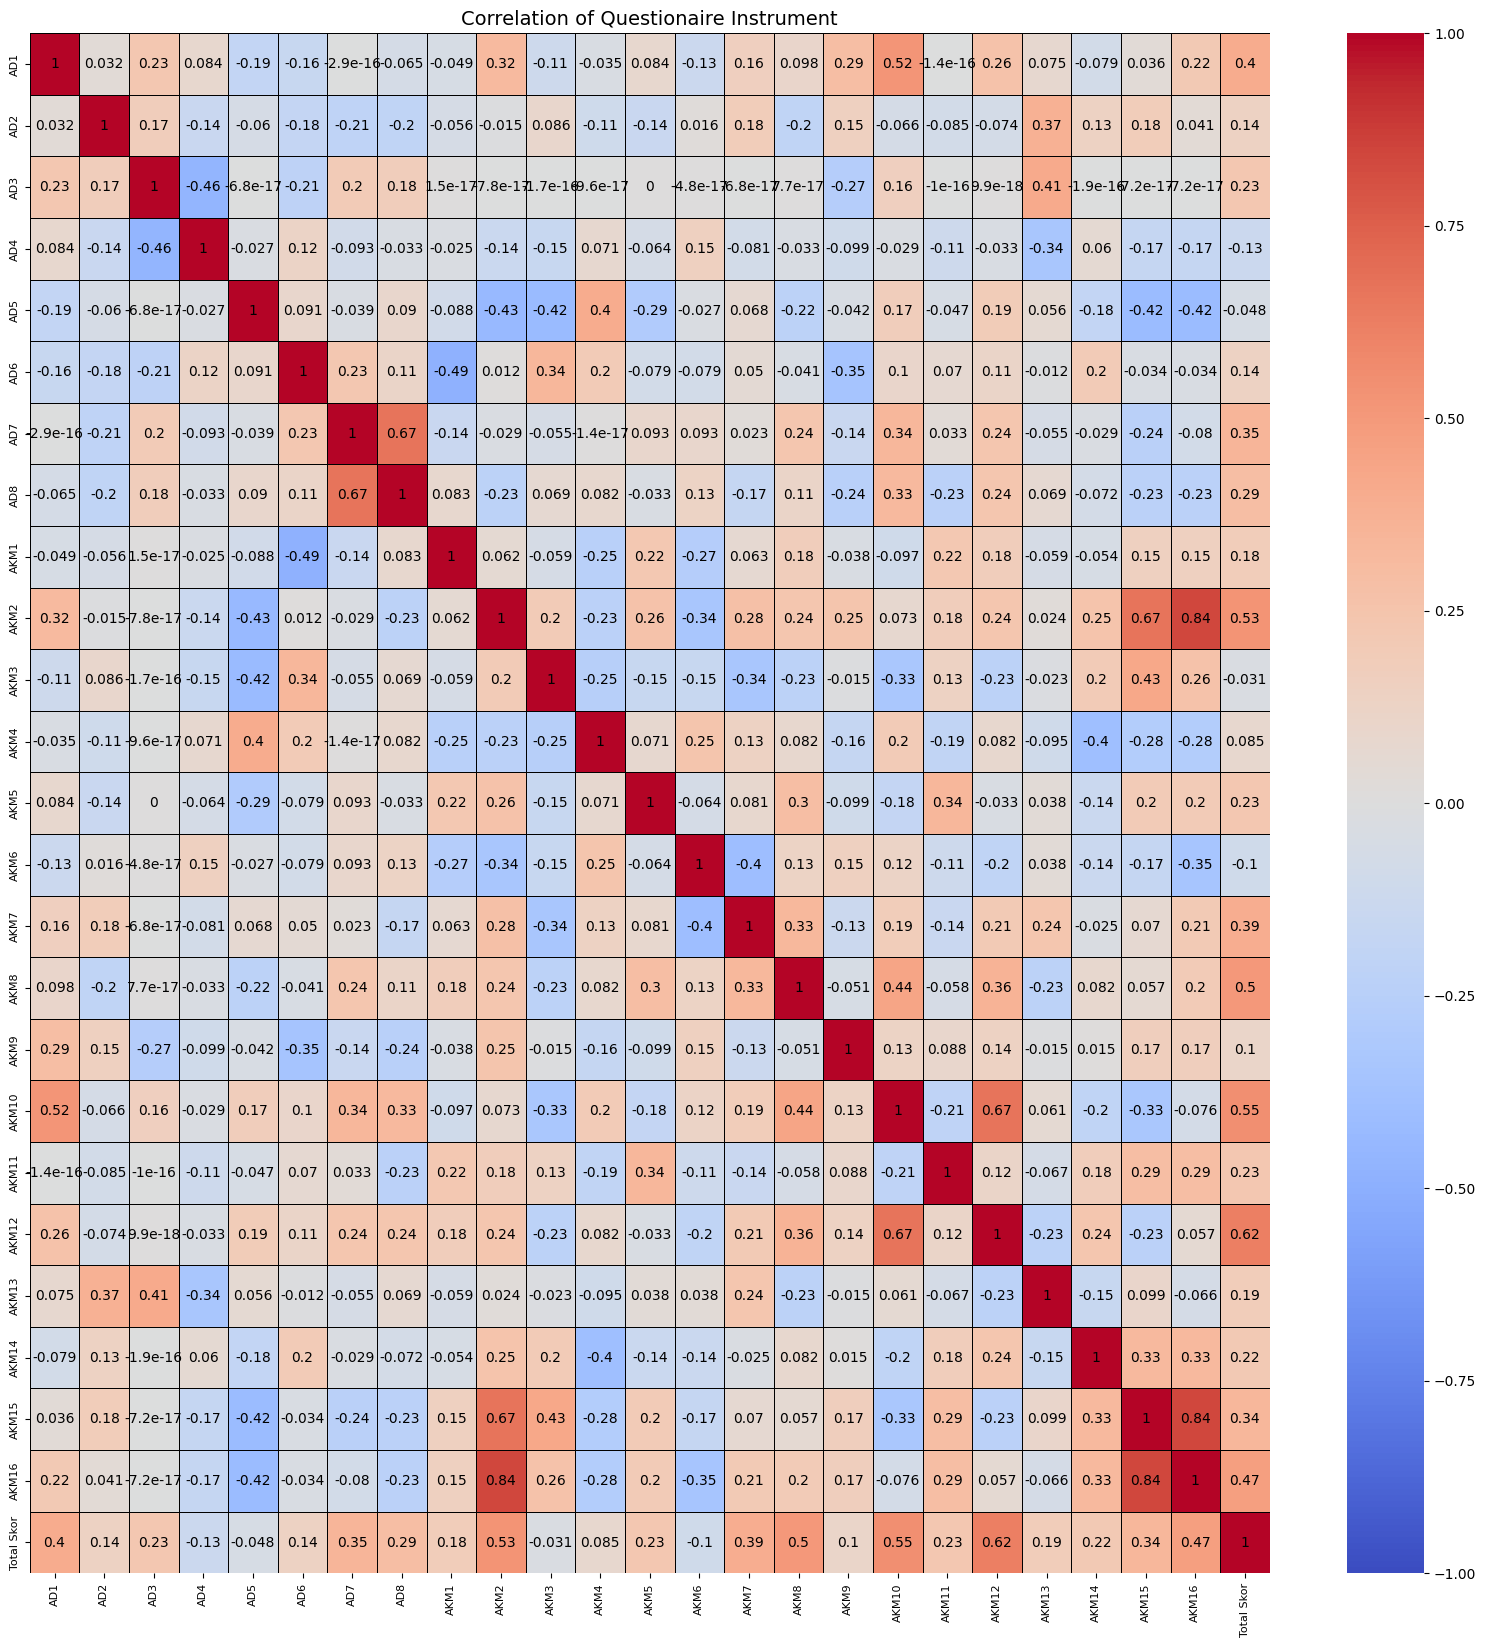

In [28]:
# dfr = df_combinedall.iloc[0:29]
dfr = df_combinedall.loc[0:29,'AD1':'AKM16']
dfr['Total Skor'] = dfr.sum(axis = 1, skipna = True)

corr_matrix = dfr.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.5,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':10,'color':'black'})

plt.tick_params(labelsize=8, rotation=90)
plt.title('Correlation of Questionaire Instrument', size=14)
plt.savefig("corr_quest1.png")

In [29]:
dfr.corr(method = 'pearson')

,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AKM1,AKM2,...,AKM8,AKM9,AKM10,AKM11,AKM12,AKM13,AKM14,AKM15,AKM16,Total Skor
AD1,1.000000e+00,0.031686,2.282177e-01,0.084215,-1.854996e-01,-0.156174,-2.920652e-16,-0.065094,-4.902903e-02,3.152442e-01,...,9.764168e-02,0.294174,0.523114,-1.427457e-16,2.603778e-01,0.075378,-7.881104e-02,3.636965e-02,2.182179e-01,0.400373
AD2,3.168621e-02,1.000000,1.735525e-01,-0.144097,-6.045717e-02,-0.178148,-2.096655e-01,-0.198009,-5.592760e-02,-1.498334e-02,...,-1.980093e-01,0.149140,-0.066302,-8.502303e-02,-7.425348e-02,0.372596,1.348501e-01,1.797770e-01,4.148699e-02,0.138603
AD3,2.282177e-01,0.173553,1.000000e+00,-0.461266,-6.848647e-17,-0.213850,2.013468e-01,0.178269,1.490714e-17,-7.787737e-17,...,7.669315e-17,-0.268543,0.159179,-1.019805e-16,9.895890e-18,0.412861,-1.857076e-16,-7.187756e-17,-7.187756e-17,0.229112
AD4,8.421519e-02,-0.144097,-4.612656e-01,1.000000,-2.678038e-02,0.118370,-9.287436e-02,-0.032892,-2.477394e-02,-1.393788e-01,...,-3.289165e-02,-0.099096,-0.029369,-1.129865e-01,-3.289165e-02,-0.342790,5.973378e-02,-1.653954e-01,-1.653954e-01,-0.129837
AD5,-1.854996e-01,-0.060457,-6.848647e-17,-0.026780,1.000000e+00,0.091049,-3.896630e-02,0.089700,-8.835014e-02,-4.344056e-01,...,-2.208000e-01,-0.041577,0.172511,-4.740455e-02,1.932000e-01,0.055930,-1.837870e-01,-4.163589e-01,-4.163589e-01,-0.048140
AD6,-1.561738e-01,-0.178148,-2.138497e-01,0.118370,9.104912e-02,1.000000,2.296425e-01,0.111827,-4.900511e-01,1.230822e-02,...,-4.066418e-02,-0.352224,0.099852,6.984303e-02,1.118265e-01,-0.011772,1.969315e-01,-3.407991e-02,-3.407991e-02,0.138121
AD7,-2.920652e-16,-0.209666,2.013468e-01,-0.092874,-3.896630e-02,0.229642,1.000000e+00,0.670018,-1.441875e-01,-2.897151e-02,...,2.392920e-01,-0.144187,0.341868,3.287980e-02,2.392920e-01,-0.055419,-2.897151e-02,-2.406555e-01,-8.021849e-02,0.347081
AD8,-6.509446e-02,-0.198009,1.782685e-01,-0.032892,8.969998e-02,0.111827,6.700175e-01,1.000000,8.297947e-02,-2.257271e-01,...,1.101695e-01,-0.242555,0.325384,-2.328890e-01,2.372881e-01,0.068694,-7.182226e-02,-2.272764e-01,-2.272764e-01,0.290962
AKM1,-4.902903e-02,-0.055928,1.490714e-17,-0.024774,-8.835014e-02,-0.490051,-1.441875e-01,0.082979,1.000000e+00,6.182447e-02,...,1.787250e-01,-0.038462,-0.096892,2.192645e-01,1.787250e-01,-0.059131,-5.409641e-02,1.497862e-01,1.497862e-01,0.183994
AKM2,3.152442e-01,-0.014983,-7.787737e-17,-0.139379,-4.344056e-01,0.012308,-2.897151e-02,-0.225727,6.182447e-02,1.000000e+00,...,2.359874e-01,0.247298,0.073293,1.762268e-01,2.359874e-01,0.023762,2.546584e-01,6.707212e-01,8.427010e-01,0.526525


In [30]:
from scipy.stats import pearsonr
for item in dfr.columns[:-1]:  # Mengecualikan kolom 'total'
    corr, p_value = pearsonr(dfr[item], dfr['Total Skor'])
    print(f'Korelasi {item} dengan total skor: {corr:.3f}, p-value: {p_value:.3f}')

Korelasi AD1 dengan total skor: 0.400, p-value: 0.028
Korelasi AD2 dengan total skor: 0.139, p-value: 0.465
Korelasi AD3 dengan total skor: 0.229, p-value: 0.223
Korelasi AD4 dengan total skor: -0.130, p-value: 0.494
Korelasi AD5 dengan total skor: -0.048, p-value: 0.801
Korelasi AD6 dengan total skor: 0.138, p-value: 0.467
Korelasi AD7 dengan total skor: 0.347, p-value: 0.060
Korelasi AD8 dengan total skor: 0.291, p-value: 0.119
Korelasi AKM1 dengan total skor: 0.184, p-value: 0.330
Korelasi AKM2 dengan total skor: 0.527, p-value: 0.003
Korelasi AKM3 dengan total skor: -0.031, p-value: 0.872
Korelasi AKM4 dengan total skor: 0.085, p-value: 0.654
Korelasi AKM5 dengan total skor: 0.232, p-value: 0.216
Korelasi AKM6 dengan total skor: -0.100, p-value: 0.600
Korelasi AKM7 dengan total skor: 0.393, p-value: 0.032
Korelasi AKM8 dengan total skor: 0.501, p-value: 0.005
Korelasi AKM9 dengan total skor: 0.103, p-value: 0.588
Korelasi AKM10 dengan total skor: 0.552, p-value: 0.002
Korelasi AKM1

Dari data yang Anda berikan, tampaknya ada beberapa nilai korelasi yang menunjukkan hubungan yang berbeda-beda dengan total skor:

- **AD1**: Korelasi 0.323 dengan p-value 0.088 menunjukkan hubungan positif yang cukup lemah dengan total skor, namun p-value lebih besar dari 0.05, jadi hasil ini tidak signifikan secara statistik.
- **AD2**: Korelasi -0.170 dengan p-value 0.378 menunjukkan hubungan negatif yang lemah dan tidak signifikan secara statistik.
- **AD3**: Korelasi 0.000 dengan p-value 1.000 menunjukkan tidak ada hubungan sama sekali dengan total skor.
- **AD4**: Korelasi -0.100 dengan p-value 0.606 juga menunjukkan hubungan negatif yang sangat lemah dan tidak signifikan.
- **AD5**: Korelasi 0.055 dengan p-value 0.777 menunjukkan hubungan positif yang sangat lemah dan tidak signifikan.
- **AD6**: Korelasi 0.046 dengan p-value 0.811 juga menunjukkan hubungan positif yang sangat lemah dan tidak signifikan.
- **AD7**: Korelasi -0.044 dengan p-value 0.822 menunjukkan hubungan negatif yang sangat lemah dan tidak signifikan.
- **AD8**: Korelasi -0.212 dengan p-value 0.269 menunjukkan hubungan negatif yang cukup lemah namun tidak signifikan secara statistik.

Untuk **AKM**:
- **AKM1**: Korelasi 0.346 dengan p-value 0.066 menunjukkan hubungan positif yang cukup kuat, tetapi p-value sedikit lebih besar dari 0.05, jadi hasil ini mendekati signifikan.
- **AKM2**: Korelasi 0.458 dengan p-value 0.012 menunjukkan hubungan positif yang signifikan secara statistik dengan total skor.
- **AKM3**: Korelasi -0.188 dengan p-value 0.329 menunjukkan hubungan negatif yang lemah dan tidak signifikan secara statistik.

### korelasi per layanan

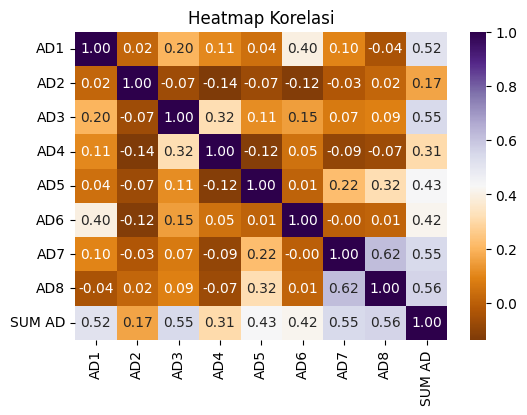

In [31]:
ranges = [
    (0, 3238, 'AD1'),     (3238, 6476, 'AD2'),     
    (6476, 9714, 'AD3'),    (9714, 12952, 'AD4'),
    (12952, 16190, 'AD5'),    (16190, 19428, 'AD6'),    
    (19428, 22666, 'AD7'),    (22666, 25904, 'AD8')
]
processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM AD'] = df_combined.sum(axis=1)
df_combined
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfAD = df_combined.loc[0:99,'AD1':'SUM AD']
corr_matrix = dfAD.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

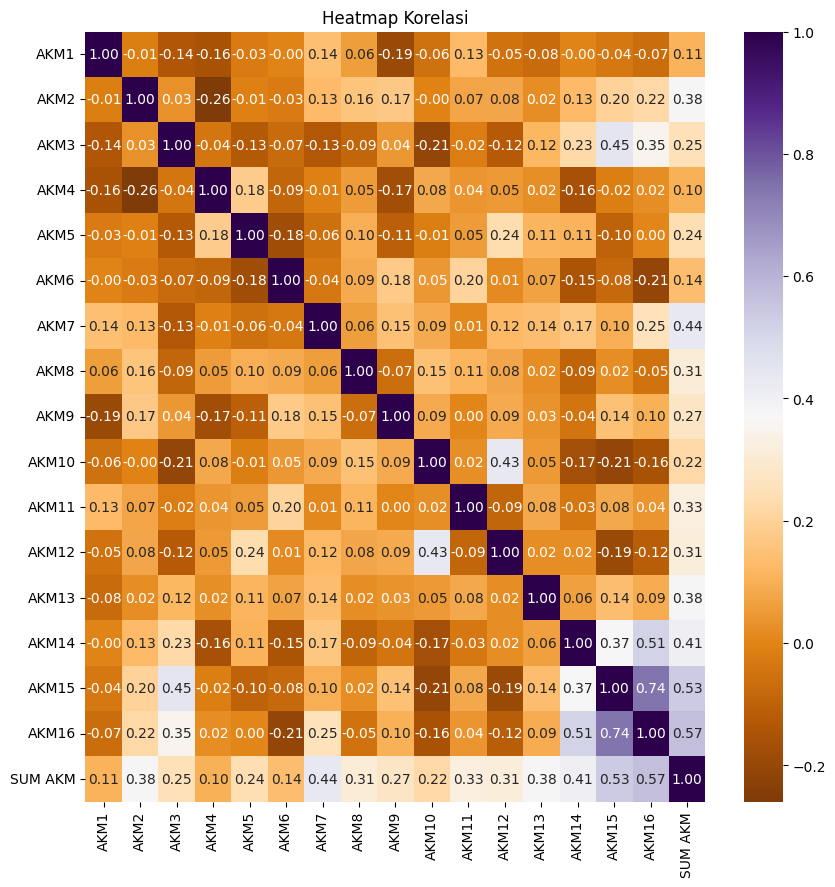

In [32]:
ranges = [
    (25904, 29122, 'AKM1'),
    (29122, 32340, 'AKM2'),
    (32340, 35558, 'AKM3'),
    (35558, 38776, 'AKM4'),
    (38776, 41994, 'AKM5'),
    (41994, 45212, 'AKM6'),
    (45212, 48430, 'AKM7'),
    (48430, 51648, 'AKM8'),
    (51648, 54866, 'AKM9'),
    (54867, 58085, 'AKM10'),
    (58085, 61303, 'AKM11'),
    (61303, 64521, 'AKM12'),
    (64521, 67739, 'AKM13'),
    (67739, 70957, 'AKM14'),
    (70958, 74176, 'AKM15'),
    (74176, 77394, 'AKM16')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM AKM'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']
# df_combined_sum

dfAKM = df_combined.loc[0:99,'AKM1':'SUM AKM']
corr_matrix = dfAKM.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

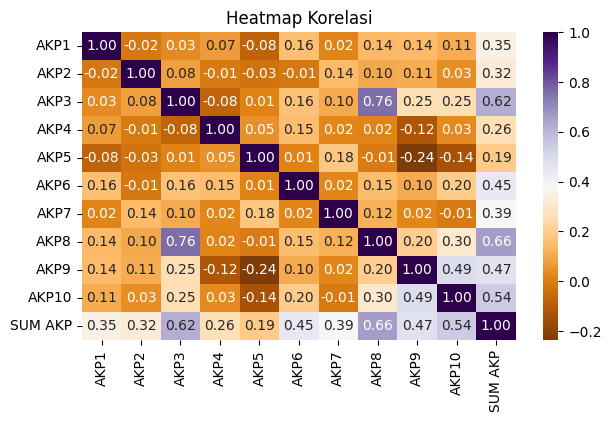

In [33]:
ranges = [
    (77394, 80603, 'AKP1'),
    (80603, 83812, 'AKP2'),   
    (83812, 87021, 'AKP3'),
    (87021, 90230, 'AKP4'),   
    (90230, 93439, 'AKP5'),
    (93439, 96648, 'AKP6'),
    (96648, 99857, 'AKP7'),
    (99857, 103066, 'AKP8'),
    (103066, 106275, 'AKP9'),
    (106275, 109484, 'AKP10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM AKP'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfAKP = df_combined.loc[0:99,'AKP1':'SUM AKP']
corr_matrix = dfAKP.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

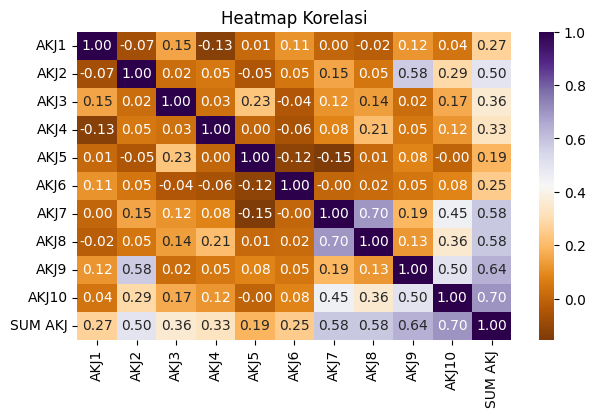

In [34]:
ranges = [
    (109484, 112689, 'AKJ1'),
    (112690, 115895, 'AKJ2'),   
    (115896, 119101, 'AKJ3'),
    (119101, 122306, 'AKJ4'),   
    (122307, 125512, 'AKJ5'),
    (125512, 128717, 'AKJ6'),
    (128718, 131923, 'AKJ7'),
    (131924, 135129, 'AKJ8'),
    (135130, 138335, 'AKJ9'),
    (138336, 141541, 'AKJ10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM AKJ'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfAKJ = df_combined.loc[0:99,'AKJ1':'SUM AKJ']
corr_matrix = dfAKJ.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

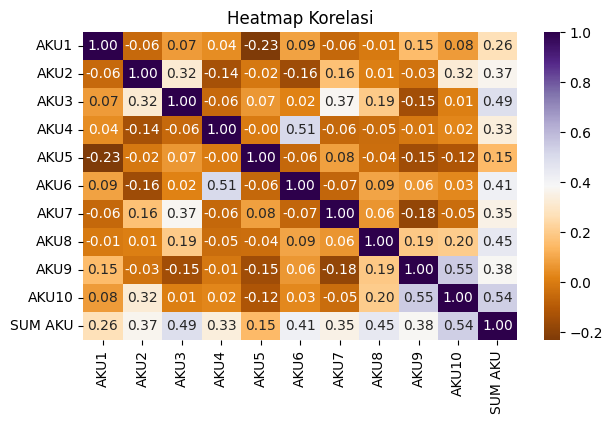

In [35]:
ranges = [
    (141541, 144753, 'AKU1'),
    (144753, 147965, 'AKU2'),
    (147965, 151177, 'AKU3'),
    (151177, 154389, 'AKU4'),
    (154389, 157601, 'AKU5'),
    (157602, 160814, 'AKU6'),
    (160814, 164026, 'AKU7'),
    (164027, 167239, 'AKU8'),
    (167239, 170451, 'AKU9'),
    (170452, 173664, 'AKU10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM AKU'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfAKU = df_combined.loc[0:99,'AKU1':'SUM AKU']
corr_matrix = dfAKU.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

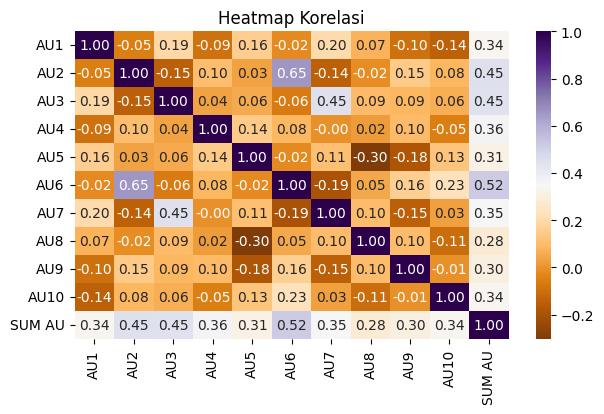

In [36]:
ranges = [
    (173664, 176870, 'AU1'),
    (176870, 180076, 'AU2'),   
    (180076, 183282, 'AU3'),
    (183282, 186488, 'AU4'),   
    (186488, 189694, 'AU5'),
    (189694, 192900, 'AU6'),
    (192900, 196106, 'AU7'),
    (196106, 199312, 'AU8'),
    (199312, 202518, 'AU9'),
    (202518, 205724, 'AU10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM AU'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfAU = df_combined.loc[0:99,'AU1':'SUM AU']
corr_matrix = dfAU.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

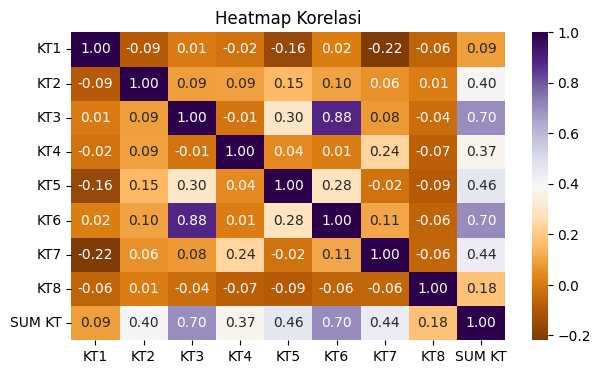

In [37]:
ranges = [
    (205724, 208921, 'KT1'),
    (208921, 212118, 'KT2'),
    (212119, 215316, 'KT3'),
    (215317, 218514, 'KT4'),
    (218515, 221712, 'KT5'),
    (221712, 224909, 'KT6'),
    (224909, 228106, 'KT7'),
    (228107, 231304, 'KT8')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM KT'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfKT = df_combined.loc[0:99,'KT1':'SUM KT']
corr_matrix = dfKT.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

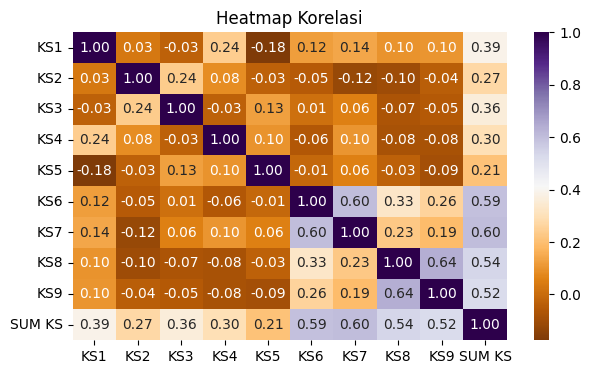

In [38]:
ranges = [
    (231304, 234504, 'KS1'),
    (234504, 237704, 'KS2'),
    (237704, 240904, 'KS3'),
    (240904, 244104, 'KS4'),
    (244104, 247304, 'KS5'),
    (247304, 250504, 'KS6'),
    (250504, 253704, 'KS7'),
    (253704, 256904, 'KS8'),
    (256904, 260104, 'KS9')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM KS'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfKS = df_combined.loc[0:99,'KS1':'SUM KS']
corr_matrix = dfKS.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

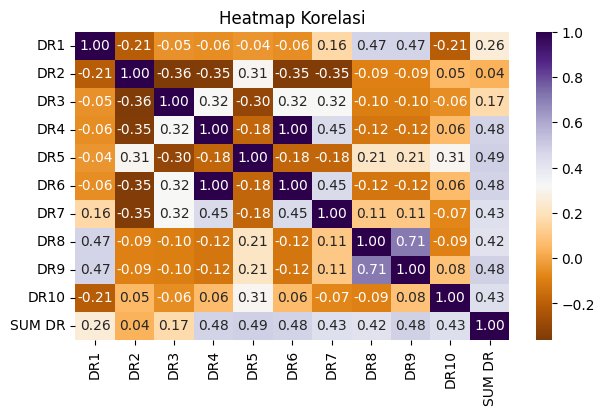

In [39]:
ranges = [
    (260104, 263299, 'DR1'),
    (263299, 266494, 'DR2'),
    (266494, 269689, 'DR3'),
    (269689, 272884, 'DR4'),
    (272884, 276079, 'DR5'),
    (276079, 279274, 'DR6'),
    (279274, 282469, 'DR7'),
    (282469, 285664, 'DR8'),
    (285664, 288859, 'DR9'),
    (288859, 292054, 'DR10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM DR'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfDR = df_combined.loc[0:29,'DR1':'SUM DR']
corr_matrix = dfDR.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

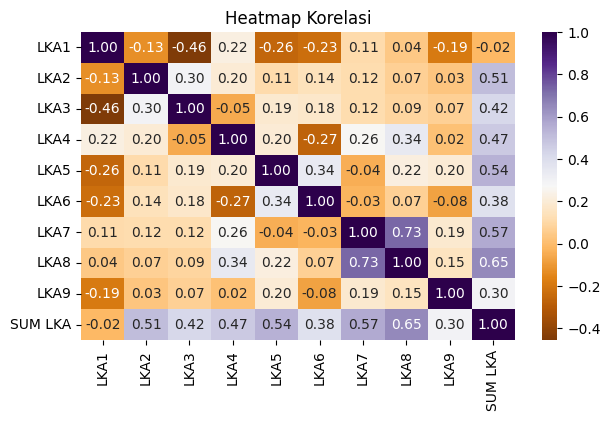

In [40]:
ranges = [
    (292054, 295248, 'LKA1'),
    (295248, 298442, 'LKA2'),
    (298442, 301636, 'LKA3'),
    (301636, 304830, 'LKA4'),
    (304830, 308024, 'LKA5'),
    (308024, 311218, 'LKA6'),
    (311218, 314412, 'LKA7'),
    (314412, 317606, 'LKA8'),
    (317606, 320800, 'LKA9')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM LKA'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfLKA = df_combined.loc[0:29,'LKA1':'SUM LKA']
corr_matrix = dfLKA.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

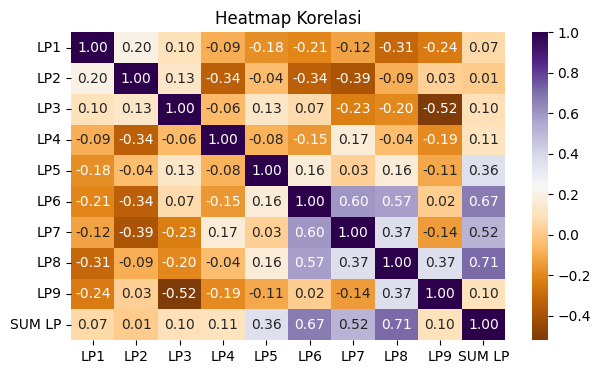

In [41]:
ranges = [
    (320801, 323996, 'LP1'),
    (323996, 327191, 'LP2'),
    (327191, 330386, 'LP3'),
    (330386, 333581, 'LP4'),
    (333581, 336776, 'LP5'),
    (336776, 339971, 'LP6'),
    (339971, 343166, 'LP7'),
    (343166, 346361, 'LP8'),
    (346361, 349556, 'LP9')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM LP'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfLP = df_combined.loc[0:29,'LP1':'SUM LP']
corr_matrix = dfLP.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

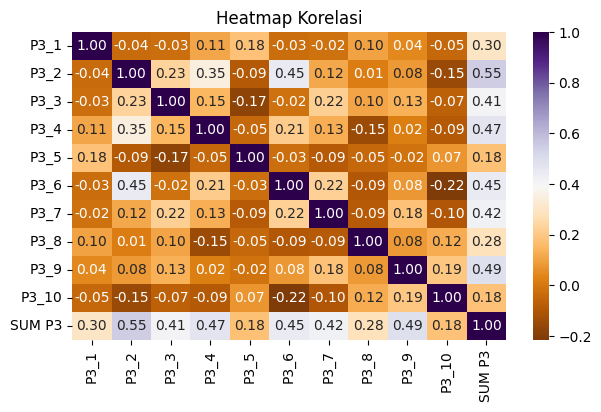

In [42]:
ranges = [
    (368707, 371910, 'P3_1'),
    (371910, 375113, 'P3_2'),
    (375114, 378317, 'P3_3'),
    (378318, 381521, 'P3_4'),
    (381521, 384724, 'P3_5'),
    (384724, 387927, 'P3_6'),
    (387928, 391131, 'P3_7'),
    (391132, 394335, 'P3_8'),
    (394336, 397539, 'P3_9'),
    (397539, 400742,'P3_10'),
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM P3'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfP3 = df_combined.loc[0:99,'P3_1':'SUM P3']
corr_matrix = dfP3.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

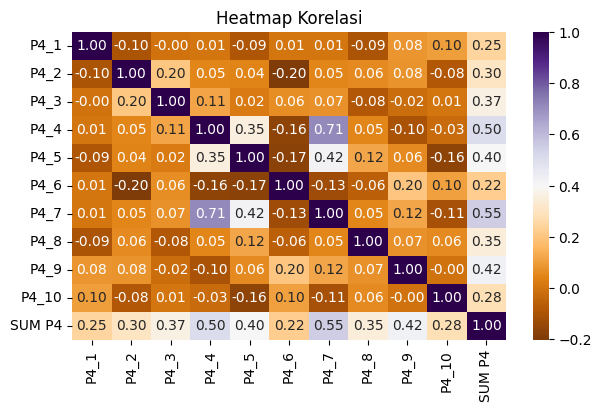

In [43]:
ranges = [
    (400743, 403684, 'P4_1'),
    (403684, 406625, 'P4_2'),
    (406625, 409566, 'P4_3'),
    (409566, 412507, 'P4_4'),
    (412507, 415448, 'P4_5'),
    (415448, 418389, 'P4_6'),
    (418389, 421330, 'P4_7'),
    (421330, 424271, 'P4_8'),
    (424271, 427212, 'P4_9'),
    (427212, 430153, 'P4_10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM P4'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfP4 = df_combined.loc[0:99,'P4_1':'SUM P4']
corr_matrix = dfP4.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

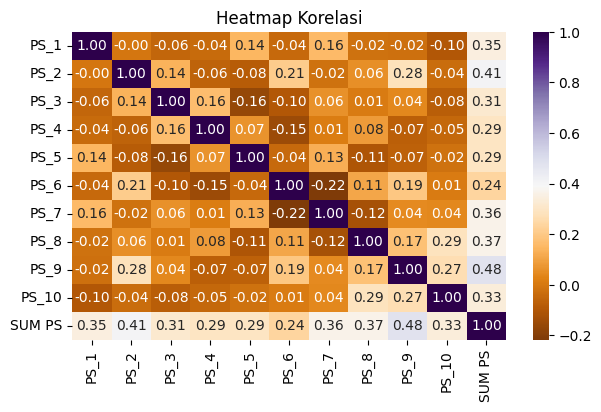

In [44]:
ranges = [
    (430153, 433092, 'PS_1'),
    (433092, 436031, 'PS_2'),
    (436031, 438970, 'PS_3'),
    (438970, 441909, 'PS_4'),
    (441909, 444848, 'PS_5'),
    (444848, 447787, 'PS_6'),
    (447787, 450726, 'PS_7'),
    (450726, 453665, 'PS_8'),
    (453665, 456604, 'PS_9'),
    (456604, 459543, 'PS_10')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM PS'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfPS = df_combined.loc[0:99,'PS_1':'SUM PS']
corr_matrix = dfPS.corr()
corr_matrix

plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

In [45]:
ranges = [
    (459543, 462733, 'PJ_1'),
    (462733, 465923, 'PJ_2'),
    (465923, 469113, 'PJ_3'),
    (469114, 472304, 'PJ_4')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM PJ'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfPJ = df_combined.loc[0:99,'PJ_1':'SUM PJ']
corr_matrix = dfPJ.corr()
corr_matrix

,PJ_1,PJ_2,PJ_3,PJ_4,SUM PJ
PJ_1,1.000000,0.071788,0.100936,-0.036886,0.525846
PJ_2,0.071788,1.000000,-0.003087,0.129750,0.544144
PJ_3,0.100936,-0.003087,1.000000,0.023795,0.494572
PJ_4,-0.036886,0.129750,0.023795,1.000000,0.569784
SUM PJ,0.525846,0.544144,0.494572,0.569784,1.000000


In [46]:
ranges = [
    (472305, 475495, 'PW_1'),
    (475496, 478686, 'PW_2'),
    (478686, 481876, 'PW_3'),
    (481877, 485067, 'PW_4')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM PW'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfPW = df_combined.loc[0:99,'PW_1':'SUM PW']
corr_matrix = dfPW.corr()
corr_matrix

,PW_1,PW_2,PW_3,PW_4,SUM PW
PW_1,1.000000,0.015319,-0.177501,-0.082564,0.370701
PW_2,0.015319,1.000000,-0.014132,0.307570,0.703211
PW_3,-0.177501,-0.014132,1.000000,-0.187188,0.300767
PW_4,-0.082564,0.307570,-0.187188,1.000000,0.553200
SUM PW,0.370701,0.703211,0.300767,0.553200,1.000000


In [47]:
ranges = [
    (485068, 488261, 'TL_1'),
    (488261, 491454, 'TL_2'),
    (491455, 494648, 'TL_3'),
    (494649, 497842, 'TL_4'),
    (497843, 501036, 'TL_5')
]

processed_dfs = [process_layanan(data2, start, end, name) for start, end, name in ranges]
df_combined = pd.concat(processed_dfs, axis=1)
df_combined['SUM TL'] = df_combined.sum(axis=1)
# df_sum = pd.DataFrame(df_combined.sum(axis=0)).T
# df_combined_sum = pd.concat([df_combined, df_sum], ignore_index=True)
# df_combined_sum.index = list(df_combined_sum.index[:-1]) + ['Total']

dfTL = df_combined.loc[0:99,'TL_1':'SUM TL']
corr_matrix = dfTL.corr()
corr_matrix

,TL_1,TL_2,TL_3,TL_4,TL_5,SUM TL
TL_1,1.000000,0.512979,0.089403,0.281555,0.005843,0.634836
TL_2,0.512979,1.000000,0.165764,0.618980,0.170400,0.788049
TL_3,0.089403,0.165764,1.000000,0.150246,0.074208,0.463032
TL_4,0.281555,0.618980,0.150246,1.000000,0.386864,0.766284
TL_5,0.005843,0.170400,0.074208,0.386864,1.000000,0.492883
SUM TL,0.634836,0.788049,0.463032,0.766284,0.492883,1.000000


### UJI RELIABILITAS

In [48]:
dfc = df_combinedall.copy()

In [49]:
df_combinedall

,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AKM1,AKM2,...,PJ_4,PW_1,PW_2,PW_3,PW_4,TL_1,TL_2,TL_3,TL_4,TL_5
0,3,3,3,4,3,3,3,3,3,3,...,3,3,4,3,3,3,3,3,3,4
1,3,3,2,3,3,3,3,3,3,3,...,3,2,2,2,4,3,3,3,4,4
2,3,4,4,2,3,3,3,3,3,3,...,4,4,3,2,4,4,4,3,4,3
3,3,4,3,4,4,3,3,3,3,3,...,3,4,3,2,3,3,3,4,3,3
4,3,3,3,3,4,4,4,4,1,3,...,3,3,3,3,3,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,4,4,3,3,2,3,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3234,3,3,3,3,3,3,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3235,3,3,4,3,3,2,3,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3236,3,3,3,4,3,4,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
dft = dfc.iloc[0:29]
dft['Total Skor'] = dft.sum(axis = 1, skipna = True)
dft.head()

C:\Users\User\AppData\Local\Temp\ipykernel_12308\3377768277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Total Skor'] = dft.sum(axis = 1, skipna = True)


,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AKM1,AKM2,...,PW_1,PW_2,PW_3,PW_4,TL_1,TL_2,TL_3,TL_4,TL_5,Total Skor
0,3,3,3,4,3,3,3,3,3,3,...,3,4,3,3,3,3,3,3,4,497
1,3,3,2,3,3,3,3,3,3,3,...,2,2,2,4,3,3,3,4,4,494
2,3,4,4,2,3,3,3,3,3,3,...,4,3,2,4,4,4,3,4,3,495
3,3,4,3,4,4,3,3,3,3,3,...,4,3,2,3,3,3,4,3,3,494
4,3,3,3,3,4,4,4,4,1,3,...,3,3,3,3,3,3,3,3,4,493


In [51]:
df_combi = dfc.iloc[0:2920]
df_combi

,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AKM1,AKM2,...,PJ_4,PW_1,PW_2,PW_3,PW_4,TL_1,TL_2,TL_3,TL_4,TL_5
0,3,3,3,4,3,3,3,3,3,3,...,3,3,4,3,3,3,3,3,3,4
1,3,3,2,3,3,3,3,3,3,3,...,3,2,2,2,4,3,3,3,4,4
2,3,4,4,2,3,3,3,3,3,3,...,4,4,3,2,4,4,4,3,4,3
3,3,4,3,4,4,3,3,3,3,3,...,3,4,3,2,3,3,3,4,3,3
4,3,3,3,3,4,4,4,4,1,3,...,3,3,3,3,3,3,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,4,3,3,3,3,1,3,3,3,3,...,3,2,3,3,2,4,4,3,3,3
2916,2,4,3,3,3,3,4,4,4,3,...,2,4,3,3,3,3,3,3,3,3
2917,4,3,3,3,3,4,4,4,3,4,...,3,4,3,3,4,3,3,3,3,4
2918,4,4,3,3,3,3,3,3,3,3,...,3,2,4,3,3,3,3,3,4,4


In [52]:
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    
    for i, col in enumerate(df_corr.columns):
        sum = df_corr[col][i+1:].values 
        rs = np.append(sum, rs)
    mean_r= np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [53]:
cronbach_alpha(dfc)

0.976616638523525

In [54]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dfc)
chi_square_value, p_value

(238838.42950448682, 0.0)

In [55]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dfc)
kmo_model

c:\Program Files\Python312\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9844661052574082

In [56]:
import pingouin as pg
pg.cronbach_alpha(data=dft)

(0.5424703128780093, array([0.272, 0.75 ]))

In [57]:
pg.cronbach_alpha(data=dfc, ci=.99)

(0.9763104324511629, array([0.975, 0.978]))

### Analisis faktor

In [58]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(dfc)

eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([36.03663735, 13.02632064,  3.29597274,  1.95083674,  1.60409368,
        1.54305091,  1.5139688 ,  1.43001712,  1.41622013,  1.35341674,
        1.30735708,  1.29891233,  1.28242894,  1.24012152,  1.2081358 ,
        1.20293872,  1.17102338,  1.13666458,  1.12423028,  1.11447527,
        1.09308409,  1.07627533,  1.06780175,  1.05364609,  1.04182451,
        1.02257327,  1.00777967,  0.99856696,  0.98747655,  0.97954351,
        0.97254708,  0.96216405,  0.95508737,  0.94364985,  0.92555381,
        0.9161428 ,  0.89655703,  0.89203091,  0.88492829,  0.87245342,
        0.86362724,  0.86085836,  0.85669311,  0.85401604,  0.83998188,
        0.83847815,  0.82655992,  0.82326164,  0.8165284 ,  0.811526  ,
        0.80370255,  0.80254322,  0.79553717,  0.79290403,  0.78331857,
        0.78127056,  0.77449287,  0.76775915,  0.76273752,  0.75807831,
        0.75600025,  0.75287441,  0.74569564,  0.74307523,  0.73756381,
        0.73051969,  0.72356287,  0.72250622,  0.71713207,  0.71

In [59]:
n_eigen = np.sum(eigen_values > 2)
n_eigen

3

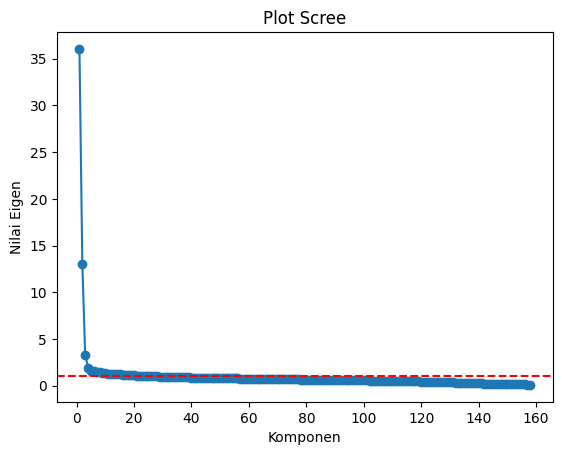

In [60]:
plt.plot(range(1, len(eigen_values) + 1), eigen_values, marker='o')
plt.xlabel('Komponen')
plt.ylabel('Nilai Eigen')
plt.title('Plot Scree')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

In [61]:
# # Create scree plot using matplotlib
# plt.scatter(range(1,df_combi.shape[1]+1),eigen_values)
# plt.plot(range(1,df_combi.shape[1]+1),eigen_values)
# plt.title('Scree Plot')
# plt.xlabel('Factors')
# plt.ylabel('Eigenvalue')
# plt.grid()
# plt.show()

In [62]:
# Ambil faktor yang mempunyai nilai eigen > 1
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(dfc)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [63]:
loadings = fa.loadings_
factor_df=pd.DataFrame(fa.loadings_,index=dfc.columns)
print(factor_df)

             0         1         2
AD1   0.006376 -0.018038 -0.002442
AD2  -0.011639  0.018298  0.006683
AD3   0.000713 -0.005414  0.008825
AD4  -0.016376 -0.006036  0.002603
AD5   0.023507  0.010222  0.011399
...        ...       ...       ...
TL_1  0.440990  0.012213  0.160662
TL_2  0.500276  0.037215  0.175527
TL_3  0.443204  0.069248  0.213305
TL_4  0.505500  0.044504  0.182415
TL_5  0.501256  0.064631  0.225450

[158 rows x 3 columns]


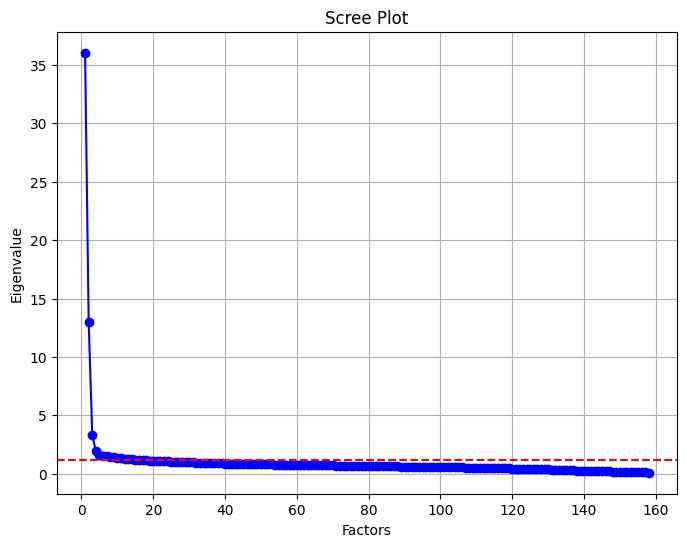

In [64]:
factors = np.arange(1, len(eigen_values) + 1)
plt.figure(figsize=(8, 6))
plt.plot(factors, eigen_values, 'bo-')  
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)  

plt.axhline(y=1.19, color='red', linestyle='--')
plt.gca().set_facecolor('white')
plt.show()

In [65]:
df_trans = df_combi.transpose()
df_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919
AD1,3,3,3,3,3,3,3,4,3,3,...,3,3,4,4,3,4,2,4,4,3
AD2,3,3,4,4,3,4,3,4,3,3,...,3,4,3,3,3,3,4,3,4,3
AD3,3,2,4,3,3,3,2,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AD4,4,3,2,4,3,3,4,3,3,3,...,3,4,3,3,3,3,3,3,3,3
AD5,3,3,3,4,4,3,3,3,3,3,...,3,4,4,4,4,3,3,3,3,3


In [66]:
data3 = dfc.transpose()
data3

,0,1,2,3,4,5,6,7,8,9,...,3228,3229,3230,3231,3232,3233,3234,3235,3236,3237
AD1,3,3,3,3,3,3,3,4,3,3,...,3,3,3,3,4,4,3,3,3,4
AD2,3,3,4,4,3,4,3,4,3,3,...,3,4,4,3,3,4,3,3,3,3
AD3,3,2,4,3,3,3,2,3,3,3,...,3,3,3,3,3,3,3,4,3,3
AD4,4,3,2,4,3,3,4,3,3,3,...,3,2,3,3,3,3,3,3,4,3
AD5,3,3,3,4,4,3,3,3,3,3,...,3,3,3,3,3,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TL_1,3,3,4,3,3,4,3,4,3,3,...,0,0,0,0,0,0,0,0,0,0
TL_2,3,3,4,3,3,4,3,4,3,3,...,0,0,0,0,0,0,0,0,0,0
TL_3,3,3,3,4,3,3,3,3,3,4,...,0,0,0,0,0,0,0,0,0,0
TL_4,3,4,4,3,3,4,3,4,3,3,...,0,0,0,0,0,0,0,0,0,0


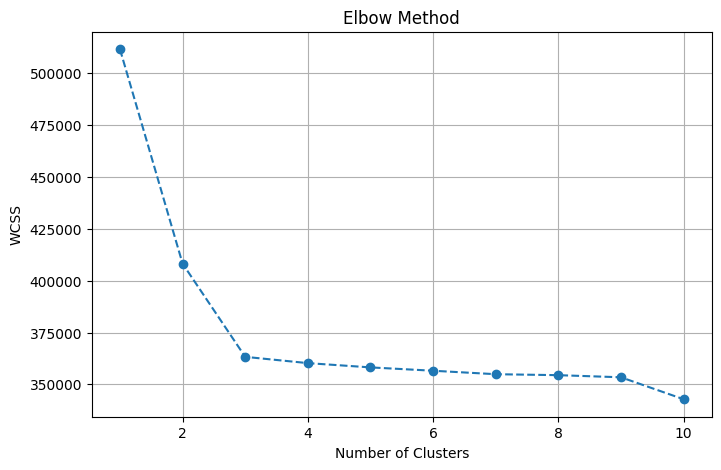

In [67]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfc)
wcss = []  # Within-Cluster-Sum-of-Squares
max_clusters = 10 

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

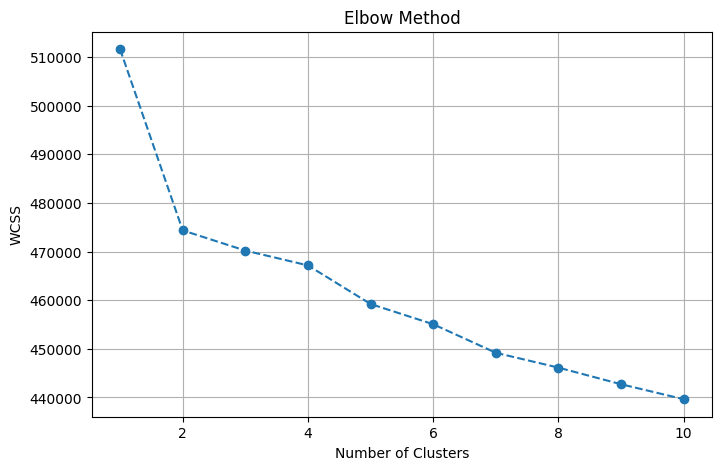

In [68]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data3)
wcss = []  # Within-Cluster-Sum-of-Squares
max_clusters = 10  

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

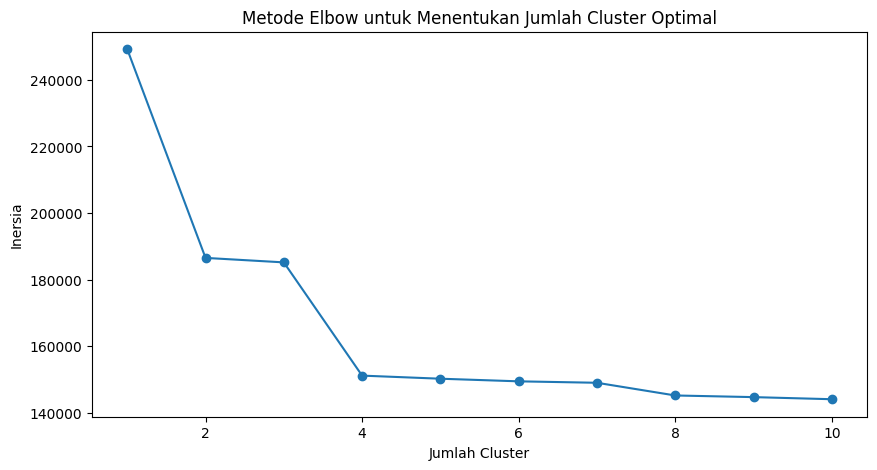

In [69]:
# Menghitung inersia untuk jumlah cluster 1 hingga 10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.show()

### Cluster

In [ ]:
# 	0	1	2	3	4	5	6	7	8	9	...	3228	3229	3230	3231	3232	3233	3234	3235	3236	3237
# AD1	3	3	3	3	3	3	3	4	3	3	...	3	3	3	3	4	4	3	3	3	4
# AD2	3	3	4	4	3	4	3	4	3	3	...	3	4	4	3	3	4	3	3	3	3
# AD3	3	2	4	3	3	3	2	3	3	3	...	3	3	3	3	3	3	3	4	3	3
# AD4	4	3	2	4	3	3	4	3	3	3	...	3	2	3	3	3	3	3	3	4	3
# AD5	3	3	3	4	4	3	3	3	3	3	...	3	3	3	3	3	2	3	3	3	4
# ...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...
# TL_1	3	3	4	3	3	4	3	4	3	3	...	0	0	0	0	0	0	0	0	0	0
# TL_2	3	3	4	3	3	4	3	4	3	3	...	0	0	0	0	0	0	0	0	0	0
# TL_3	3	3	3	4	3	3	3	3	3	4	...	0	0	0	0	0	0	0	0	0	0
# TL_4	3	4	4	3	3	4	3	4	3	3	...	0	0	0	0	0	0	0	0	0	0
# TL_5	4	4	3	3	4	3	4	3	3	3	...	0	0	0	0	0	0	0	0	0	0

In [70]:
data3.to_csv('data/cluster.csv', index=False)

In [71]:
model = KMeans(n_clusters=3)
model.fit(data3)

KMeans(n_clusters=3)

In [72]:
k_means_labels = model.fit_predict(data3)
k_means_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [73]:
data3['Cluster'] = k_means_labels
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,3229,3230,3231,3232,3233,3234,3235,3236,3237,Cluster
AD1,3,3,3,3,3,3,3,4,3,3,...,3,3,3,4,4,3,3,3,4,0
AD2,3,3,4,4,3,4,3,4,3,3,...,4,4,3,3,4,3,3,3,3,0
AD3,3,2,4,3,3,3,2,3,3,3,...,3,3,3,3,3,3,4,3,3,0
AD4,4,3,2,4,3,3,4,3,3,3,...,2,3,3,3,3,3,3,4,3,0
AD5,3,3,3,4,4,3,3,3,3,3,...,3,3,3,3,2,3,3,3,4,0


In [74]:
centroids  = model.cluster_centers_  
print(centroids)

from sklearn.metrics import silhouette_score
cluster_labels = kmeans.fit_predict(dfc)
print(f'\nSilhouette Score(n=3): {silhouette_score(dfc, cluster_labels)}')

[[ 3.09638554e+00  3.10843373e+00  3.10843373e+00 ...  3.01204819e-01
   3.25301205e-01  3.25301205e-01]
 [ 3.15000000e+00  3.15000000e+00  3.20000000e+00 ...  2.77555756e-17
  -2.77555756e-17 -2.77555756e-17]
 [ 3.21818182e+00  3.14545455e+00  3.14545455e+00 ...  2.77555756e-17
   0.00000000e+00  0.00000000e+00]]

Silhouette Score(n=3): 0.05101446302784315


In [75]:
def f(row):
    if row['Cluster'] == 0:
        val = 1
    elif row['Cluster'] == 1:
        val = 2
    elif row['Cluster'] == 2:
        val = 3
    return val

data3['Klaster KMeans'] = data3.apply(f, axis=1)

In [76]:
data3 = data3.drop(columns =(['Cluster']))
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,3229,3230,3231,3232,3233,3234,3235,3236,3237,Klaster KMeans
AD1,3,3,3,3,3,3,3,4,3,3,...,3,3,3,4,4,3,3,3,4,1
AD2,3,3,4,4,3,4,3,4,3,3,...,4,4,3,3,4,3,3,3,3,1
AD3,3,2,4,3,3,3,2,3,3,3,...,3,3,3,3,3,3,4,3,3,1
AD4,4,3,2,4,3,3,4,3,3,3,...,2,3,3,3,3,3,3,4,3,1
AD5,3,3,3,4,4,3,3,3,3,3,...,3,3,3,3,2,3,3,3,4,1


In [77]:
# datac = df_cluster.T
datac = data3[['Klaster KMeans']]
datac

,Klaster KMeans
AD1,1
AD2,1
AD3,1
AD4,1
AD5,1
...,...
TL_1,3
TL_2,3
TL_3,3
TL_4,3


In [78]:
def map_prefix_to_name(prefix):
    if prefix.startswith('AD'):
        return 'ADMINISTASI AKADEMIK'
    elif prefix.startswith('AKM'):
        return 'ADMINISTRASI KEMAHASISWAAN'
    elif prefix.startswith('AKP'):
        return 'ADMINISTRASI KEPEGAWAIAN'
    elif prefix.startswith('AKJ'):
        return 'ADMINISTRASI KERJASAMA'
    elif prefix.startswith('AKU'):
        return 'ADMINISTRASI KEUANGAN'
    elif prefix.startswith('AU'):
        return 'ADMINISTRASI UMUM'
    elif prefix.startswith('KT'):
        return 'KANTIN'
    elif prefix.startswith('KS'):
        return 'KESEKRETARIATAN'
    elif prefix.startswith('DR'):
        return 'LAYANAN DOKTER KAMPUS'
    elif prefix.startswith('LKA'):
        return 'LAYANAN KEAMANAN'
    elif prefix.startswith('LP'):
        return 'LAYANAN PARKIR'
    elif prefix.startswith('LK'):
        return 'LINGKUNGAN KAMPUS'
    elif prefix.startswith('ML'):
        return 'MAILING LIST'
    elif prefix.startswith('MIS'):
        return 'MANAGEMENT INFORMATION SYSTEM (MIS)'
    elif prefix.startswith('P3'):
        return 'PERPUSTAKAAN GEDUNG D3'
    elif prefix.startswith('P4'):
        return 'PERPUSTAKAAN GEDUNG D4'
    elif prefix.startswith('PS'):
        return 'PERPUSTAKAAN GEDUNG PASCASARJANA'
    elif prefix.startswith('PJ'):
        return 'PORTAL JURUSAN/PRODI'
    elif prefix.startswith('PW'):
        return 'PORTAL WEB PENS'
    elif prefix.startswith('TL'):
        return 'TOILET'
    return 'Unknown'

datac['LAYANAN'] = datac.index.to_series().apply(map_prefix_to_name)
datac

C:\Users\User\AppData\Local\Temp\ipykernel_12308\2181249472.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac['LAYANAN'] = datac.index.to_series().apply(map_prefix_to_name)


,Klaster KMeans,LAYANAN
AD1,1,ADMINISTASI AKADEMIK
AD2,1,ADMINISTASI AKADEMIK
AD3,1,ADMINISTASI AKADEMIK
AD4,1,ADMINISTASI AKADEMIK
AD5,1,ADMINISTASI AKADEMIK
...,...,...
TL_1,3,TOILET
TL_2,3,TOILET
TL_3,3,TOILET
TL_4,3,TOILET


In [79]:
criteria_mapping = {
    'AD1': 'Kecepatan dalam melayani',
    'AD2': 'Ketrampilan petugas dalam melayani',
    'AD3': 'Persyaratan pelayanan jelas',
    'AD4': 'Petugas disiplin terhadap waktu pelayanan',
    'AD5': 'Petugas yang melayani jelas',
    'AD6': 'Prosedur pelayanan mudah (diketahui)',
    'AD7': 'Sikap dan perilaku (perilaku) petugas',
    'AD8': 'Tanggung jawab dan empati petugas',

    'AKM1': 'Kecepatan dalam melayani',
    'AKM2': 'Ketrampilan petugas dalam melayani',
    'AKM3': 'Layanan akses informasi sistem seleksi mahasiswa baru',
    'AKM4': 'Layanan karir dan bimbingan kewirausahaan',
    'AKM5': 'Layanan kesejahteraan dan layanan kesehatan',
    'AKM6': 'Layanan minat dan bakat termasuk kegiatan mahasiswa dan UKM',
    'AKM7': 'Layanan penalaran, dan softskills',
    'AKM8': 'Layanan proses registrasi mahasiswa baru',
    'AKM9': 'Penataan sarana rapi',
    'AKM10': 'Persyaratan pelayanan jelas',
    'AKM11': 'Petugas disiplin terhadap waktu pelayanan',
    'AKM12': 'Petugas yang melayani jelas',
    'AKM13': 'Prosedur pelayanan mudah (diketahui)',
    'AKM14': 'Ruangan bersih',
    'AKM15': 'Sikap dan perilaku (perilaku) petugas',
    'AKM16': 'Tanggung jawab dan empati petugas',

    'AKP1': 'Kecepatan dalam melayani',
    'AKP2': 'Ketrampilan petugas dalam melayani',
    'AKP3': 'Penataan sarana rapi',
    'AKP4': 'Persyaratan pelayanan jelas',
    'AKP5': 'Petugas disiplin terhadap waktu pelayanan',
    'AKP6': 'Petugas yang melayani jelas',
    'AKP7': 'Prosedur pelayanan mudah (diketahui)',
    'AKP8': 'Ruangan bersih',
    'AKP9': 'Sikap dan perilaku (perilaku) petugas',
    'AKP10': 'Tanggung jawab dan empati petugas',

    'AKJ1': 'Kecepatan dalam melayani',
    'AKJ2': 'Ketrampilan petugas dalam melayani',
    'AKJ3': 'Penataan sarana rapi',
    'AKJ4': 'Persyaratan pelayanan jelas',
    'AKJ5': 'Petugas disiplin terhadap waktu pelayanan',
    'AKJ6': 'Petugas yang melayani jelas',
    'AKJ7': 'Prosedur pelayanan mudah (diketahui)',
    'AKJ8': 'Ruangan bersih',
    'AKJ9': 'Sikap dan perilaku (perilaku) petugas',
    'AKJ10': 'Tanggung jawab dan empati petugas',

    'AKU1': 'Kecepatan dalam melayani',
    'AKU2': 'Ketrampilan petugas dalam melayani',
    'AKU3': 'Penataan sarana rapi',
    'AKU4': 'Persyaratan pelayanan jelas',
    'AKU5': 'Petugas disiplin terhadap waktu pelayanan',
    'AKU6': 'Petugas yang melayani jelas',
    'AKU7': 'Prosedur pelayanan mudah (diketahui)',
    'AKU8': 'Ruangan bersih',
    'AKU9': 'Sikap dan perilaku (perilaku) petugas',
    'AKU10': 'Tanggung jawab dan empati petugas',

    'AU1': 'Kecepatan dalam melayani',
    'AU2': 'Ketrampilan petugas dalam melayani',
    'AU3': 'Penataan sarana rapi',
    'AU4': 'Persyaratan pelayanan jelas',
    'AU5': 'Petugas disiplin terhadap waktu pelayanan',
    'AU6': 'Petugas yang melayani jelas',
    'AU7': 'Prosedur pelayanan mudah (diketahui)',
    'AU8': 'Ruangan bersih',
    'AU9': 'Sikap dan perilaku (perilaku) petugas',
    'AU10': 'Tanggung jawab dan empati petugas',

    'KT1': 'Kecepatan dalam melayani',
    'KT2': 'Ketrampilan petugas dalam melayani',
    'KT3': 'Penataan sarana rapi',
    'KT4': 'Persyaratan pelayanan jelas',
    'KT5': 'Petugas yang melayani jelas',
    'KT6': 'Prosedur pelayanan mudah (diketahui)',
    'KT7': 'Ruangan bersih',
    'KT8': 'Sikap dan perilaku (perilaku) petugas',

    'KS1': 'Kecepatan dalam melayani',
    'KS2': 'Ketrampilan petugas dalam melayani',
    'KS3': 'Persyaratan pelayanan jelas',
    'KS4': 'Petugas disiplin terhadap waktu pelayanan',
    'KS5': 'Petugas yang melayani jelas',
    'KS6': 'Prosedur pelayanan mudah (diketahui)',
    'KS7': 'Ruangan bersih',
    'KS8': 'Sikap dan perilaku (perilaku) petugas',
    'KS9': 'Tanggung jawab dan empati petugas',

    'DR1': 'Kecepatan dalam melayani',
    'DR2': 'Ketrampilan petugas dalam melayani',
    'DR3': 'Penataan sarana rapi',
    'DR4': 'Persyaratan pelayanan jelas',
    'DR5': 'Petugas disiplin terhadap waktu pelayanan',
    'DR6': 'Petugas yang melayani jelas',
    'DR7': 'Prosedur pelayanan mudah (diketahui)',
    'DR8': 'Ruangan bersih',
    'DR9': 'Sikap dan perilaku (perilaku) petugas',
    'DR10': 'Tanggung jawab dan empati petugas',

    'LKA1': 'Kecepatan dalam melayani',
    'LKA2': 'Ketrampilan petugas dalam melayani',
    'LKA3': 'Persyaratan pelayanan jelas',
    'LKA4': 'Petugas disiplin terhadap waktu pelayanan',
    'LKA5': 'Petugas yang melayani jelas',
    'LKA6': 'Prosedur pelayanan mudah (diketahui)',
    'LKA7': 'Ruangan bersih',
    'LKA8': 'Sikap dan perilaku (perilaku) petugas',
    'LKA9': 'Tanggung jawab dan empati petugas',

    'LP1': 'Kecepatan dalam melayani',
    'LP2': 'Ketrampilan petugas dalam melayani',
    'LP3': 'Persyaratan pelayanan jelas',
    'LP4': 'Petugas disiplin terhadap waktu pelayanan',
    'LP5': 'Petugas yang melayani jelas',
    'LP6': 'Prosedur pelayanan mudah (diketahui)',
    'LP7': 'Ruangan bersih',
    'LP8': 'Sikap dan perilaku (perilaku) petugas',
    'LP9': 'Tanggung jawab dan empati petugas',

    'LK1': 'Lingkungan bersih',
    'LK2': 'Penataan (taman, dll.)  bagus',

    'ML1': 'Kecepatan akses',

    'MIS1': 'Kecepatan akses',
    'MIS2': 'Keragaman fitur/konten',
    'MIS3': 'Konten/berita informatif',

    'P3_1': 'Kecepatan dalam melayani',
    'P3_2': 'Ketrampilan petugas dalam melayani',
    'P3_3': 'Penataan sarana rapi',
    'P3_4': 'Persyaratan pelayanan jelas',
    'P3_5': 'Petugas disiplin terhadap waktu pelayanan',
    'P3_6': 'Petugas yang melayani jelas',
    'P3_7': 'Prosedur pelayanan mudah (diketahui)',
    'P3_8': 'Ruangan bersih',
    'P3_9': 'Sikap dan perilaku (perilaku) petugas',
    'P3_10': 'Tanggung jawab dan empati petugas',

    'P4_1': 'Kecepatan dalam melayani',
    'P4_2': 'Ketrampilan petugas dalam melayani',
    'P4_3': 'Penataan sarana rapi',
    'P4_4': 'Persyaratan pelayanan jelas',
    'P4_5': 'Petugas disiplin terhadap waktu pelayanan',
    'P4_6': 'Petugas yang melayani jelas',
    'P4_7': 'Prosedur pelayanan mudah (diketahui)',
    'P4_8': 'Ruangan bersih',
    'P4_9': 'Sikap dan perilaku (perilaku) petugas',
    'P4_10': 'Tanggung jawab dan empati petugas',

    'PS_1': 'Kecepatan dalam melayani',
    'PS_2': 'Ketrampilan petugas dalam melayani',
    'PS_3': 'Penataan sarana rapi',
    'PS_4': 'Persyaratan pelayanan jelas',
    'PS_5': 'Petugas disiplin terhadap waktu pelayanan',
    'PS_6': 'Petugas yang melayani jelas',
    'PS_7': 'Prosedur pelayanan mudah (diketahui)',
    'PS_8': 'Ruangan bersih',
    'PS_9': 'Sikap dan perilaku (perilaku) petugas',
    'PS_10': 'Tanggung jawab dan empati petugas',

    'PJ_1': 'Kecepatan akses',
    'PJ_2': 'Keragaman fitur/konten',
    'PJ_3': 'Konten/berita informatif',
    'PJ_4': 'Konten/berita up-to-date',

    'PW_1': 'Kecepatan akses',
    'PW_2': 'Keragaman fitur/konten',
    'PW_3': 'Konten/berita informatif',
    'PW_4': 'Konten/berita up-to-date',

    'TL_1': 'Bau',
    'TL_2': 'Kebersihan closet',
    'TL_3': 'Kebersihan ruangan toilet',
    'TL_4': 'Kebersihan wastafel',
    'TL_5': 'Persyaratan pelayanan jelas'
}

def get_kriteria(row):
    for code, criteria in criteria_mapping.items():
        if code in row.name:
            return criteria
    return 'Unknown'
datac['KRITERIA'] = datac.apply(get_kriteria, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_12308\3550811331.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac['KRITERIA'] = datac.apply(get_kriteria, axis=1)


In [80]:
total_row = dfc.sum()
dfc.loc['Total Bobot'] = total_row
dfc_total = dfc.copy()
dfc_total = dfc_total.transpose()

dfc_total['LAYANAN'] = dfc_total.index.to_series().apply(map_prefix_to_name)
dfc_total['KRITERIA'] = dfc_total.apply(get_kriteria, axis=1)
dfc_total = dfc_total[['Total Bobot','LAYANAN','KRITERIA']]
dfc_total.to_csv('data/totalskor.csv', index=False)
dfc_total

,Total Bobot,LAYANAN,KRITERIA
AD1,10253,ADMINISTASI AKADEMIK,Kecepatan dalam melayani
AD2,10408,ADMINISTASI AKADEMIK,Ketrampilan petugas dalam melayani
AD3,10327,ADMINISTASI AKADEMIK,Persyaratan pelayanan jelas
AD4,10292,ADMINISTASI AKADEMIK,Petugas disiplin terhadap waktu pelayanan
AD5,10294,ADMINISTASI AKADEMIK,Petugas yang melayani jelas
...,...,...,...
TL_1,9532,TOILET,Bau
TL_2,9852,TOILET,Kebersihan closet
TL_3,9862,TOILET,Kebersihan ruangan toilet
TL_4,9933,TOILET,Kebersihan wastafel


In [81]:
datac = datac[['LAYANAN','KRITERIA','Klaster KMeans']]
datac.to_csv('data/klaster.csv', index=False)
datac

,LAYANAN,KRITERIA,Klaster KMeans
AD1,ADMINISTASI AKADEMIK,Kecepatan dalam melayani,1
AD2,ADMINISTASI AKADEMIK,Ketrampilan petugas dalam melayani,1
AD3,ADMINISTASI AKADEMIK,Persyaratan pelayanan jelas,1
AD4,ADMINISTASI AKADEMIK,Petugas disiplin terhadap waktu pelayanan,1
AD5,ADMINISTASI AKADEMIK,Petugas yang melayani jelas,1
...,...,...,...
TL_1,TOILET,Bau,3
TL_2,TOILET,Kebersihan closet,3
TL_3,TOILET,Kebersihan ruangan toilet,3
TL_4,TOILET,Kebersihan wastafel,3


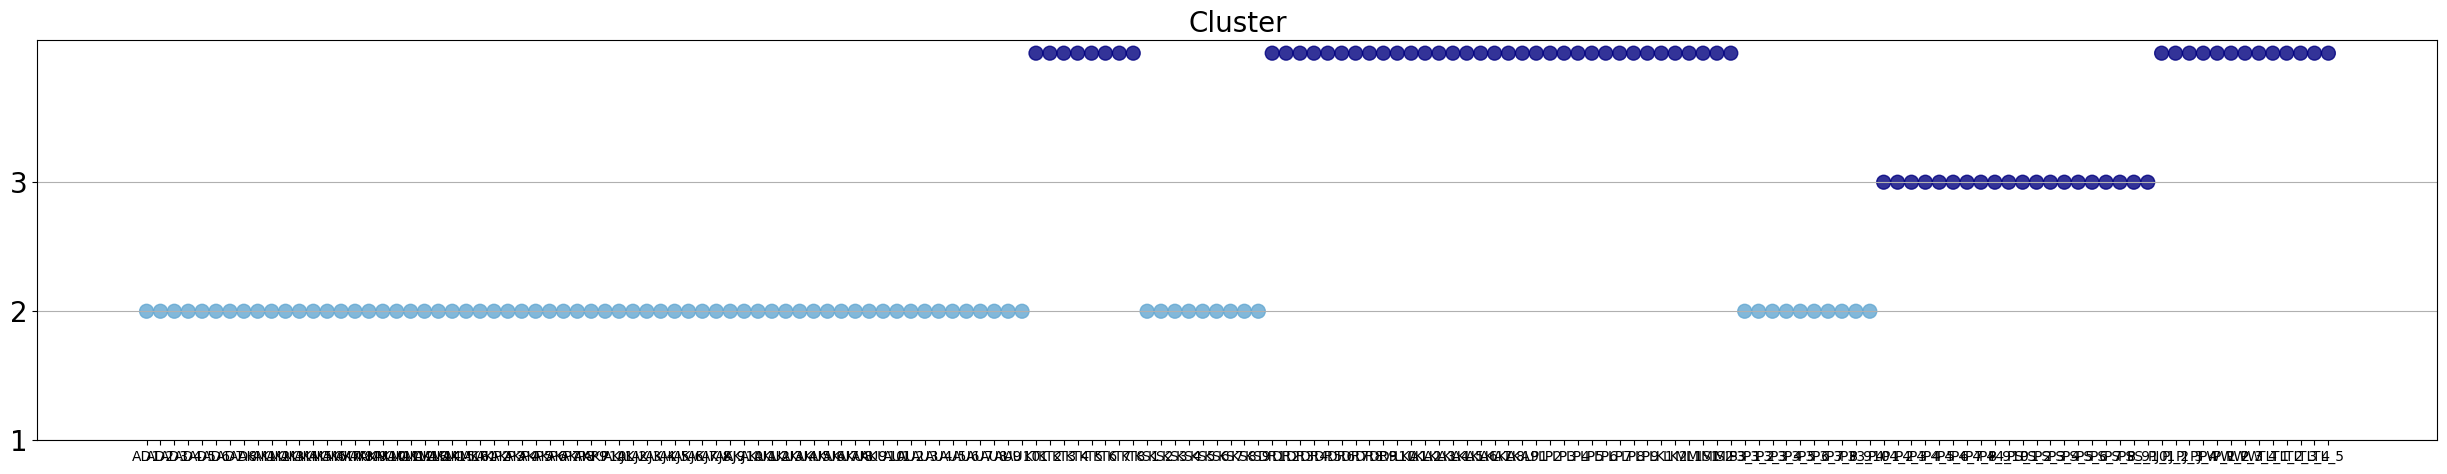

In [82]:
colors = ['#63A7D1', '#00007F']
cmap = ListedColormap(colors)

# Mengatur ukuran plot
plt.figure(figsize=(30, 5))
plt.scatter(data3.index,data3['Klaster KMeans'], c=data3['Klaster KMeans'], cmap=cmap, s=100, alpha=0.8)
plt.title('Cluster', fontsize=20)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tick_params(axis='y', labelsize=15)
plt.yticks([0, 1,2], ['1', '2','3'], fontsize=20)
plt.grid(True, which='major', axis='y')
plt.show()

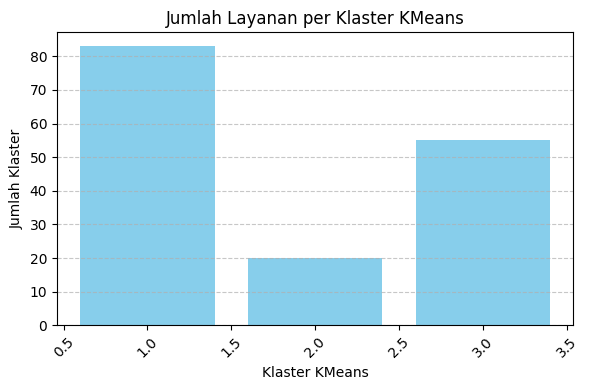

In [83]:
cluster_counts = datac['Klaster KMeans'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Klaster KMeans')
plt.ylabel('Jumlah Klaster')
plt.title('Jumlah Layanan per Klaster KMeans')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
file1 = pd.read_csv('data/totalskor.csv')
file2 = pd.read_csv('data/klaster.csv')
if len(file2) == len(file1):
    file2['Total Bobot'] = file1['Total Bobot']
else:
    raise ValueError("Jumlah baris berbeda antara file.")

file2

,LAYANAN,KRITERIA,Klaster KMeans,Total Bobot
0,ADMINISTASI AKADEMIK,Kecepatan dalam melayani,1,10253
1,ADMINISTASI AKADEMIK,Ketrampilan petugas dalam melayani,1,10408
2,ADMINISTASI AKADEMIK,Persyaratan pelayanan jelas,1,10327
3,ADMINISTASI AKADEMIK,Petugas disiplin terhadap waktu pelayanan,1,10292
4,ADMINISTASI AKADEMIK,Petugas yang melayani jelas,1,10294
...,...,...,...,...
153,TOILET,Bau,3,9532
154,TOILET,Kebersihan closet,3,9852
155,TOILET,Kebersihan ruangan toilet,3,9862
156,TOILET,Kebersihan wastafel,3,9933


In [85]:
file2.to_csv('data/cluster_layanan.csv', index=False)

In [86]:
mean_bobot_per_klaster = file2.groupby('Klaster KMeans')['Total Bobot'].mean()
mean_bobot_sorted = mean_bobot_per_klaster.sort_values(ascending=False)
mean_bobot_sorted

Klaster KMeans
1    10330.084337
3    10051.054545
2     9590.900000
Name: Total Bobot, dtype: float64

In [87]:
df = file2.copy()
grouped = df.groupby(['LAYANAN', 'Klaster KMeans']).agg({
    'Total Bobot': ['sum', 'mean'],
    'KRITERIA': 'count'
}).reset_index()
grouped.columns = ['LAYANAN', 'Klaster KMeans', 'Total Bobot Sum', 'Total Bobot Mean', 'Criteria Count']

pivot = df.pivot_table(index='LAYANAN', columns='Klaster KMeans', values='Total Bobot', aggfunc='sum')
conditions = [
    (df['Total Bobot'] >= 10000),
    (df['Total Bobot'] >= 9500) & (df['Total Bobot'] < 10000),
    (df['Total Bobot'] < 9500)
]
categories = ['High', 'Medium', 'Low']
df['Klasifikasi'] = np.select(conditions, categories)
kmeans_distribution = df['Klaster KMeans'].value_counts()

# print(kmeans_distribution)
df

,LAYANAN,KRITERIA,Klaster KMeans,Total Bobot,Klasifikasi
0,ADMINISTASI AKADEMIK,Kecepatan dalam melayani,1,10253,High
1,ADMINISTASI AKADEMIK,Ketrampilan petugas dalam melayani,1,10408,High
2,ADMINISTASI AKADEMIK,Persyaratan pelayanan jelas,1,10327,High
3,ADMINISTASI AKADEMIK,Petugas disiplin terhadap waktu pelayanan,1,10292,High
4,ADMINISTASI AKADEMIK,Petugas yang melayani jelas,1,10294,High
...,...,...,...,...,...
153,TOILET,Bau,3,9532,Medium
154,TOILET,Kebersihan closet,3,9852,Medium
155,TOILET,Kebersihan ruangan toilet,3,9862,Medium
156,TOILET,Kebersihan wastafel,3,9933,Medium


In [88]:
mean_bobot_per_klaster = file2.groupby('Klaster KMeans')['Total Bobot'].mean()
mean_bobot_sorted = mean_bobot_per_klaster.sort_values(ascending=False)
mapping_klaster = {mean_bobot_sorted.index[0]: "Tinggi", 
                   mean_bobot_sorted.index[1]: "Sedang", 
                   mean_bobot_sorted.index[2]: "Rendah"}

file2['Label Klaster'] = file2['Klaster KMeans'].map(mapping_klaster)
file2

,LAYANAN,KRITERIA,Klaster KMeans,Total Bobot,Label Klaster
0,ADMINISTASI AKADEMIK,Kecepatan dalam melayani,1,10253,Tinggi
1,ADMINISTASI AKADEMIK,Ketrampilan petugas dalam melayani,1,10408,Tinggi
2,ADMINISTASI AKADEMIK,Persyaratan pelayanan jelas,1,10327,Tinggi
3,ADMINISTASI AKADEMIK,Petugas disiplin terhadap waktu pelayanan,1,10292,Tinggi
4,ADMINISTASI AKADEMIK,Petugas yang melayani jelas,1,10294,Tinggi
...,...,...,...,...,...
153,TOILET,Bau,3,9532,Sedang
154,TOILET,Kebersihan closet,3,9852,Sedang
155,TOILET,Kebersihan ruangan toilet,3,9862,Sedang
156,TOILET,Kebersihan wastafel,3,9933,Sedang


In [89]:
X = file2[['Total Bobot']]
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

centroid_values = kmeans.cluster_centers_
print("Centroid tiap klaster berdasarkan Total Bobot:")
for i, centroid in enumerate(centroid_values):
    print(f"Klaster {i+1}: {centroid[0]}")

Centroid tiap klaster berdasarkan Total Bobot:
Klaster 1: 9989.3
Klaster 2: 9600.8
Klaster 3: 10313.825242718447


In [90]:
df.to_csv('data/hasil1.csv', index=False)
file2.to_csv('data/hasil2.csv', index=False)

In [91]:
# dataa = data[['NAMA_LAYANAN', 'NAMA_JENIS_KRITERIA']].head(2920)
# dataa['Klaster KMeans'] = df_cluster['Klaster KMeans'].values
# data

In [92]:
# dataa = data.iloc[0:2920]
# dataa = dataa.transpose()
# dataa

In [93]:
# pca = PCA()
# pca.fit(df_combinedall)

# explained_variance = pca.explained_variance_
# components = range(1, len(explained_variance) + 1)

# plt.figure(figsize=(8, 6))  # Adjust the figure size to match your example
# plt.plot(components, explained_variance, 'bo-', linewidth=2)  # blue circle markers connected by a line
# plt.title('Scree Plot')
# plt.xlabel('Factors')  # Adjust the label to match your example
# plt.ylabel('Eigenvalue')
# plt.grid(True)  # This adds a grid to the plot

# plt.axhline(y=1.1, color='red', linestyle='--')
# plt.show()

In [94]:
# data2['row_index'] = data2.groupby('NAMA_JENIS_KRITERIA').cumcount()
# df_pivoted = data2.pivot_table(index=data2.index, columns='NAMA_JENIS_KRITERIA', values='BOBOT', aggfunc='first')
# df_pivoted.reset_index(drop=True, inplace=True)
# df_pivoted

In [95]:
# df_pivoted = layanan_ad.pivot(index='NAMA_LAYANAN', columns='JENIS_KRITERIA', values='BOBOT')
# df_pivoted.reset_index(inplace=True)
# df_pivoted

In [96]:
# # layanan_jenis = pd.read_csv('total_bobot_layanan.csv')
# data1['JENIS_KRITERIA'] = data1.groupby('NAMA_LAYANAN').cumcount() + 1
# data1['JENIS_KRITERIA'] = data1['NAMA_LAYANAN'] + data1['JENIS_KRITERIA'].astype(str)
# data2 = data1.drop(columns=['NAMA_JENIS_KRITERIA'])
# data2 = data2[['NAMA_LAYANAN', 'JENIS_KRITERIA', 'BOBOT']]
# data2
# # data2.to_csv('layanan_jenis.csv', index=False)

In [97]:
# filtered_df = data1[(data1['NAMA_LAYANAN'] == 'AD') & (data1['NAMA_JENIS_KRITERIA'] == 'AD6')]
# count = filtered_df.shape[0]
# print(f'Number of rows matching the criteria: {count}')

In [98]:
# filtered_df = data1[(data1['NAMA_LAYANAN'] == 'PS')]
# counts = filtered_df['NAMA_JENIS_KRITERIA'].value_counts()
# print("Number of rows for each NAMA_JENIS_KRITERIA value:")
# print(counts)

In [99]:
# df = pd.read_csv('total_bobot_layanan.csv')
# # Create a mapping for the renaming
# criteria_mapping = {
#     'Kecepatan dalam melayani': 'AD1',    'Ketrampilan petugas dalam melayani': 'AD2',
#     'Persyaratan pelayanan jelas': 'AD3',    'Petugas disiplin terhadap waktu pelayanan': 'AD4',
#     'Petugas yang melayani jelas': 'AD5',    'Prosedur pelayanan mudah (diketahui)':'AD6',
#     'Sikap dan perilaku (perilaku) petugas':'AD7',    'Tanggung jawab dan empati petugas':'AD8'


    
# }

# # Apply the mapping to rename the criteria
# df['NAMA_JENIS_KRITERIA'] = df['NAMA_JENIS_KRITERIA'].map(criteria_mapping)

# print(df)

In [100]:
# # Mengganti nilai pada kolom 'NAMA_JENIS_KRITERIA' menjadi 'AD1', 'AD2', dst.
# unique_criteria = data['NAMA_JENIS_KRITERIA'].unique()
# criteria_mapping = {original: f'AD{i+1}' for i, original in enumerate(unique_criteria)}
# print("Mapping Kriteria:", criteria_mapping)

# # Menggunakan mapping untuk mengganti nilai di kolom 'NAMA_JENIS_KRITERIA'
# data['NAMA_JENIS_KRITERIA'] = data['NAMA_JENIS_KRITERIA'].map(criteria_mapping)
# print("\nData setelah mengganti 'NAMA_JENIS_KRITERIA' menjadi 'AD1', 'AD2', dst.:")
# data

In [101]:
# # Menambahkan kolom baru untuk menyimpan nilai kriteria baru
# data['NAMA_JENIS_KRITERIA_NEW'] = data.groupby('NAMA_LAYANAN').cumcount() + 1

# # Menggabungkan NAMA_LAYANAN dengan urutan untuk membuat NAMA_JENIS_KRITERIA yang baru
# data['NAMA_JENIS_KRITERIA'] = data['NAMA_LAYANAN'] + ' ' + data['NAMA_JENIS_KRITERIA_NEW'].astype(str)

# # Menghapus kolom NAMA_JENIS_KRITERIA_NEW yang tidak diperlukan lagi
# data = data.drop(columns=['NAMA_JENIS_KRITERIA_NEW'])
# data